# Load Libraries

In [2]:
# Supress Warnings
# import warnings
# warnings.filterwarnings('ignore')

# Visualization
# import ipyleaflet
import matplotlib.pyplot as plt
import seaborn as sns

# Data Science
import numpy as np
import pandas as pd
import statsmodels.api as sm
import sklearn

# Planetary Computer Tools
# import pystac
# import pystac_client
# import odc
# from pystac_client import Client
# from pystac.extensions.eo import EOExtension as eo
# from odc.stac import stac_load
# import planetary_computer as pc
# # Import common GIS tools

# import xarray as xr
# import rasterio.features
# import rioxarray as rio
# import xrspatial.multispectral as ms

# # Import Planetary Computer tools
# import odc
# from odc.stac import stac_load
# from odc.algo import to_rgba

# Please pass your API key here
# pc.settings.set_subscription_key('********************')

# Others
# import requests
# import rich.table
from itertools import cycle
from tqdm.notebook import tqdm as tqdm
tqdm.pandas()

# Read Data

In [3]:
crop_yield_data = pd.read_csv("Crop_Yield_Data_challenge_2.csv", parse_dates=['Date of Harvest'], dayfirst=True)
crop_yield_data.columns = ['district', 'latitude', 'longitude', 'season', 'intensity', 'date_of_harvest', 'field_size', 'rice_yield']
crop_yield_data.head()

,district,latitude,longitude,season,intensity,date_of_harvest,field_size,rice_yield
0,Chau_Phu,10.510542,105.248554,SA,T,2022-07-15,3.40,5500
1,Chau_Phu,10.509150,105.265098,SA,T,2022-07-15,2.43,6000
2,Chau_Phu,10.467721,105.192464,SA,D,2022-07-15,1.95,6400
3,Chau_Phu,10.494453,105.241281,SA,T,2022-07-15,4.30,6000
4,Chau_Phu,10.535058,105.252744,SA,D,2022-07-14,3.30,6400


In [4]:
crop_yield_data[crop_yield_data.duplicated(subset=['latitude', 'longitude'], keep=False)].sort_values(['latitude', 'longitude'])

,district,latitude,longitude,season,intensity,date_of_harvest,field_size,rice_yield
449,Thoai_Son,10.195117,105.200047,SA,T,2022-07-20,3.20,5600
531,Thoai_Son,10.195117,105.200047,WS,T,2022-04-05,3.20,7200
445,Thoai_Son,10.208515,105.202809,SA,T,2022-07-20,2.67,6400
527,Thoai_Son,10.208515,105.202809,WS,T,2022-04-05,2.67,7200
451,Thoai_Son,10.227394,105.164987,SA,T,2022-07-20,3.00,5600
...,...,...,...,...,...,...,...,...
119,Chau_Phu,10.636733,105.155635,WS,T,2022-04-10,3.20,8000
28,Chau_Phu,10.649258,105.142121,SA,D,2022-08-05,1.75,6000
120,Chau_Phu,10.649258,105.142121,WS,D,2022-04-10,1.75,8000
29,Chau_Phu,10.663484,105.168203,SA,D,2022-08-05,3.00,6500


In [5]:
sub_sample = pd.read_csv("Challenge_2_submission_template.csv", parse_dates=['Date of Harvest'], dayfirst=True)
sub_sample.columns = ['id', 'district', 'latitude', 'longitude', 'season', 'intensity', 'date_of_harvest', 'field_size', 'rice_yield']
sub_sample.head()

,id,district,latitude,longitude,season,intensity,date_of_harvest,field_size,rice_yield
0,1,Chau_Phu,10.542192,105.187920,WS,T,2022-04-10,1.40,NaN
1,2,Chau_Thanh,10.400189,105.331053,SA,T,2022-07-15,1.32,NaN
2,3,Chau_Phu,10.505489,105.203926,SA,D,2022-07-14,1.40,NaN
3,4,Chau_Phu,10.523520,105.138274,WS,D,2022-04-10,1.80,NaN
4,5,Thoai_Son,10.294660,105.248528,SA,T,2022-07-20,2.20,NaN


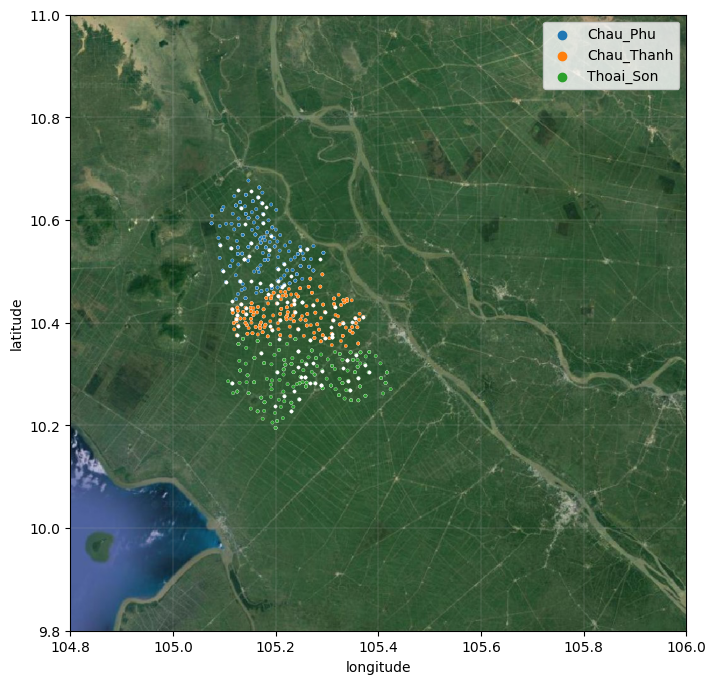

In [6]:
sns.scatterplot(data=crop_yield_data, x='longitude', y='latitude', hue='district', s=6)
sns.scatterplot(data=sub_sample, x='longitude', y='latitude', color='white', s=6)

fig = plt.gcf()
ax  = plt.gca()

fig.set_size_inches(8, 8)

ax.set_aspect('equal')
ax.patch.set_alpha(0)
plt.grid(lw=0.15)
plt.legend()
# legend.legendHandles[0]._sizes = [40]
# legend.legendHandles[1]._sizes = [40]
# legend.set_alpha(0)

plt.xlim(104.8, 106)
plt.ylim(9.8, 11)

# [0.06, 0, 0.95, 0.95]

newax = fig.add_axes(ax.get_position(), anchor='SW', zorder=-15)
# newax.set_position(ax.get_position())
newax.imshow(plt.imread('../Full Region no labels.jpg'), aspect='auto')
newax.axis('off')
# ax.set_xlim(105.3338 - 10**-2/2, 105.3338+ 10**-2/2)
# ax.set_ylim(10.4391  - 10**-2/2, 10.4391 + 10**-2/2)
# newax.set_xlim(105.3338 - 10**-2/2, 105.3338+ 10**-2/2)
# newax.set_ylim(10.4391  - 10**-2/2, 10.4391 + 10**-2/2)
plt.grid(False)

# Process Data

## Constant Features

<AxesSubplot: >

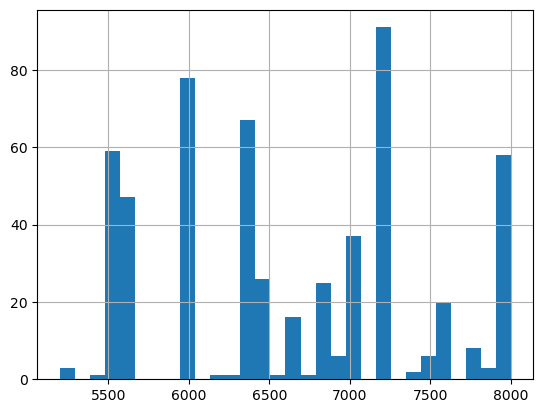

In [7]:
crop_yield_data['rice_yield'].hist(bins=30)

<AxesSubplot: >

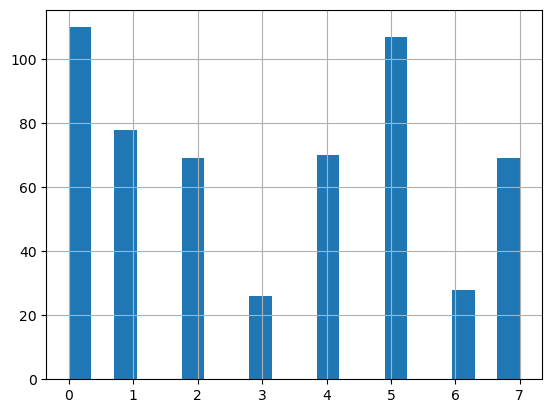

In [8]:
crop_yield_data['target_class'] = pd.qcut(crop_yield_data['rice_yield'], q=8, labels=False)
crop_yield_data['target_class'].hist(bins=20)

In [9]:
crop_yield_data.head(2)

,district,latitude,longitude,season,intensity,date_of_harvest,field_size,rice_yield,target_class
0,Chau_Phu,10.510542,105.248554,SA,T,2022-07-15,3.40,5500,0
1,Chau_Phu,10.509150,105.265098,SA,T,2022-07-15,2.43,6000,1


In [10]:
train_const_data = pd.get_dummies(crop_yield_data.drop(['district'], axis=1), drop_first=True).drop(['latitude', 'longitude'], axis=1)
sub_const_data   = pd.get_dummies(sub_sample.drop(['district', 'rice_yield', 'id'], axis=1), drop_first=True).drop(['latitude', 'longitude'], axis=1)
display(train_const_data.head(2), sub_const_data.head(2))

,date_of_harvest,field_size,rice_yield,target_class,season_WS,intensity_T
0,2022-07-15,3.40,5500,0,0,1
1,2022-07-15,2.43,6000,1,0,1


,date_of_harvest,field_size,season_WS,intensity_T
0,2022-04-10,1.40,1,1
1,2022-07-15,1.32,0,1


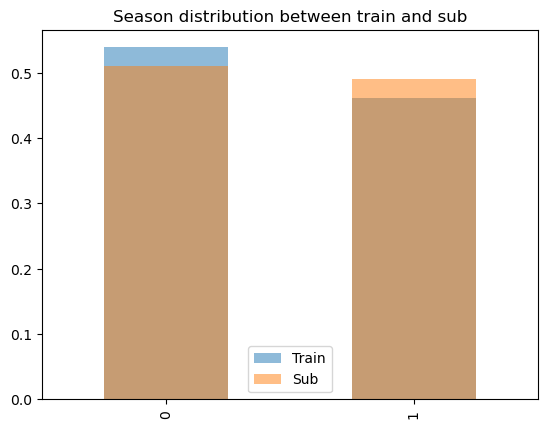

In [11]:
train_const_data.season_WS.value_counts(normalize=True).plot.bar(alpha=0.5, label='Train')
sub_const_data.season_WS.value_counts(normalize=True).plot.bar(alpha=0.5, color='C1', label='Sub')
plt.title('Season distribution between train and sub')
plt.legend();

In [12]:
train_const_data['start_of_harvest']     = train_const_data.date_of_harvest - pd.to_timedelta('99d')
sub_const_data  ['start_of_harvest']     = sub_const_data.date_of_harvest -   pd.to_timedelta('99d')
train_const_data['dayofyear_of_harvest'] = train_const_data.date_of_harvest.dt.day_of_year
sub_const_data['dayofyear_of_harvest']   = sub_const_data.date_of_harvest.dt.day_of_year
display(train_const_data.head(2), sub_const_data.head(2))

,date_of_harvest,field_size,rice_yield,target_class,season_WS,intensity_T,start_of_harvest,dayofyear_of_harvest
0,2022-07-15,3.40,5500,0,0,1,2022-04-07,196
1,2022-07-15,2.43,6000,1,0,1,2022-04-07,196


,date_of_harvest,field_size,season_WS,intensity_T,start_of_harvest,dayofyear_of_harvest
0,2022-04-10,1.40,1,1,2022-01-01,100
1,2022-07-15,1.32,0,1,2022-04-07,196


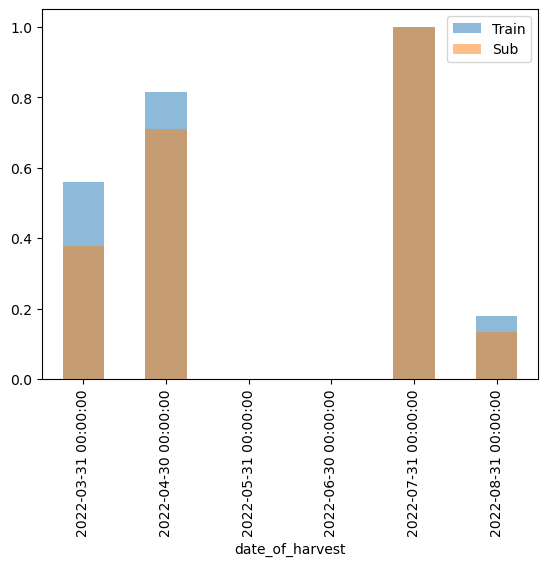

<AxesSubplot: >

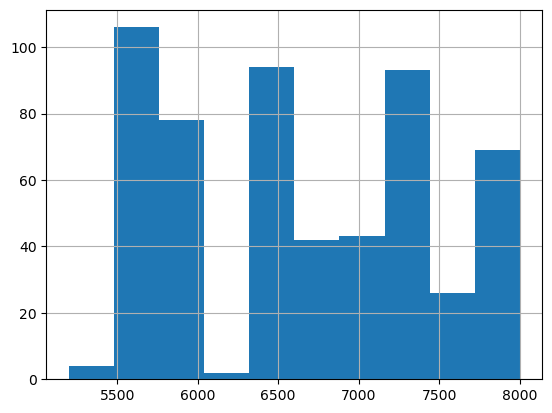

In [111]:
train_const_data.set_index('date_of_harvest').resample('m').count().apply(lambda x:x/x.max()).iloc[:, 0].plot.bar(alpha=0.5, label='Train')
sub_const_data.set_index('date_of_harvest').resample('m').count().apply(lambda x:x/x.max()).iloc[:, 0].plot.bar(alpha=0.5, color='C1', label='Sub')
plt.legend()
plt.show()
train_const_data.rice_yield.hist(bins=10)

In [14]:
# sns.kdeplot(data=train_const_data, x='date_of_harvest', y='rice_yield', hue='intensity_T', levels=8, fill=True, alpha=0.5)
# plt.title('Yield by date and by intensity')

In [15]:
# sns.heatmap(train_const_data.corr(), cmap='coolwarm', annot=True)

In [16]:
# sns.pairplot(train_const_data)

In [17]:
# sns.pairplot(sub_const_data)

## Time Series features

In [187]:
train_ts_data = pd.read_csv('train_data_level2.csv', index_col=['index', 'datetime'], parse_dates=True, dayfirst=True)
sub_ts_data   = pd.read_csv('sub_data_level2.csv'  , index_col=['index', 'datetime'], parse_dates=True, dayfirst=True)
# train_sent2_data = pd.read_csv('train_sentinel2_level2_fix.csv', index_col=['index', 'datetime'], parse_dates=True).drop('SCL', axis=1).replace(0, np.nan)
# sub_sent2_data = pd.read_csv('sub_sentinel2_level2.csv', index_col=['index', 'datetime'], parse_dates=True).drop('SCL', axis=1).replace(0, np.nan)

train_sent2_data = pd.read_pickle('level2_sent2_train.df')
sub_sent2_data   = pd.read_pickle('level2_sent2_sub.df'  )

train_sent2_data = train_sent2_data.rename_axis(['index', 'datetime'])
sub_sent2_data   = sub_sent2_data.rename_axis(['index', 'datetime'])

display(train_ts_data.head(2), train_sent2_data.head(2), sub_sent2_data.head(2))

vh        vv       rvi
index datetime                                                
0     2021-09-05 22:45:35.619475  0.006411  0.036697  0.229400
      2021-09-11 22:46:08.311308  0.019033  0.295205  0.059627

red                        \
                                      mean  median percentile_20   
index datetime                                                     
0     2022-02-19 03:17:49.024  1649.775391  1406.5        1251.0   
      2022-02-24 03:17:31.024          NaN     NaN           NaN   

                                                               green          \
                              percentile_80         std         mean  median   
index datetime                                                                 
0     2022-02-19 03:17:49.024        2036.0  543.111408  1933.546509  1693.0   
      2022-02-24 03:17:31.024           NaN         NaN          NaN     NaN   

                                                                      ...  \
                              percentile_20 percentile_80        std  ...   
index datetime                                                        ...   
0     2022-02-19 03:17:49.024        1556.0   2336.399902  538.90375  ...   
      2022-02-24 03:17:31.024           NaN           NaN        NaN  ...   

                                   rededge                        \
                                      mean  median percentile_20   
index datetime                                                     
0     2022-02-19 03:17:49.024  2205.781982  1990.5        1798.0   
      2022-02-24 03:17:31.024          NaN     NaN           NaN   

                                                              swir16          \
                              percentile_80         std         mean  median   
index datetime                                                                 
0     2022-02-19 03:17:49.024   2595.600098  581.085265  3068.577881  2948.0   
      2022-02-24 03:17:31.024           NaN         NaN          NaN     NaN   

                                                                       
                              percentile_20 percentile_80         std  
index datetime                                                         
0     2022-02-19 03:17:49.024   2656.399902   3432.600098  605.145364  
      2022-02-24 03:17:31.024           NaN           NaN         NaN  

[2 rows x 30 columns]

red                                         \
                              mean median percentile_20 percentile_80 std   
index datetime                                                              
0     2021-11-11 03:19:49.024  NaN    NaN           NaN           NaN NaN   
      2021-11-16 03:20:11.024  NaN    NaN           NaN           NaN NaN   

                              green                                         \
                               mean median percentile_20 percentile_80 std   
index datetime                                                               
0     2021-11-11 03:19:49.024   NaN    NaN           NaN           NaN NaN   
      2021-11-16 03:20:11.024   NaN    NaN           NaN           NaN NaN   

                               ... rededge                                     \
                               ...    mean median percentile_20 percentile_80   
index datetime                 ...                                              
0     2021-11-11 03:19:49.024  ...     NaN    NaN           NaN           NaN   
      2021-11-16 03:20:11.024  ...     NaN    NaN           NaN           NaN   

                                  swir16                                     \
                              std   mean median percentile_20 percentile_80   
index datetime                                                                
0     2021-11-11 03:19:49.024 NaN    NaN    NaN           NaN           NaN   
      2021-11-16 03:20:11.024 NaN    NaN    NaN           NaN           NaN   

                                   
                              std  
index datetime                     
0     2021-11-11 03:19:49.024 NaN  
      2021-11-16 03:20:11.024 NaN  

[2 rows x 30 columns]

In [188]:
multicols_names = train_sent2_data.columns.map('_'.join)
train_sent2_data.columns = multicols_names
sub_sent2_data.columns   = multicols_names

aggregations_to_use = 'median' #|percentile_(80|20)
train_sent2_data = train_sent2_data.filter(regex=aggregations_to_use) 
sub_sent2_data = sub_sent2_data.filter(regex=aggregations_to_use)

train_sent2_data.head(2)


red_median  green_median  blue_median  \
index datetime                                                         
0     2022-02-19 03:17:49.024      1406.5        1693.0       1469.5   
      2022-02-24 03:17:31.024         NaN           NaN          NaN   

                               nir_median  rededge_median  swir16_median  
index datetime                                                            
0     2022-02-19 03:17:49.024      5540.0          1990.5         2948.0  
      2022-02-24 03:17:31.024         NaN             NaN            NaN

### Slicing time frame

In [189]:
train_ts_data = pd.concat([train_ts_data, train_sent2_data], axis=1)
sub_ts_data   = pd.concat([sub_ts_data   , sub_sent2_data] , axis=1)

In [190]:
train_ts_data.reset_index(level=1).groupby(level=0)\
.apply(lambda x: x.set_index('datetime').resample('1d').median())

vh        vv       rvi  red_median  green_median  \
index datetime                                                             
0     2021-09-05  0.006411  0.036697  0.229400         NaN           NaN   
      2021-09-06       NaN       NaN       NaN         NaN           NaN   
      2021-09-07       NaN       NaN       NaN         NaN           NaN   
      2021-09-08       NaN       NaN       NaN         NaN           NaN   
      2021-09-09       NaN       NaN       NaN         NaN           NaN   
...                    ...       ...       ...         ...           ...   
556   2022-12-20       NaN       NaN       NaN         NaN           NaN   
      2022-12-21       NaN       NaN       NaN         NaN           NaN   
      2022-12-22       NaN       NaN       NaN         NaN           NaN   
      2022-12-23  0.006916  0.113862  0.054806         NaN           NaN   
      2022-12-24  0.006872  0.051070  0.163378         NaN           NaN   

                  blue_median  nir_median  rededge_median  swir16_median  
index datetime                                                            
0     2021-09-05          NaN         NaN             NaN            NaN  
      2021-09-06          NaN         NaN             NaN            NaN  
      2021-09-07          NaN         NaN             NaN            NaN  
      2021-09-08          NaN         NaN             NaN            NaN  
      2021-09-09          NaN         NaN             NaN            NaN  
...                       ...         ...             ...            ...  
556   2022-12-20          NaN         NaN             NaN            NaN  
      2022-12-21          NaN         NaN             NaN            NaN  
      2022-12-22          NaN         NaN             NaN            NaN  
      2022-12-23          NaN         NaN             NaN            NaN  
      2022-12-24          NaN         NaN             NaN            NaN  

[265132 rows x 9 columns]

In [191]:
train_ts_data    = train_ts_data.unstack(    level=0).resample('5d').mean().interpolate().bfill().ffill().stack(dropna=False).swaplevel().sort_index(level=0)
sub_ts_data      = sub_ts_data.unstack(      level=0).resample('5d').mean().interpolate().bfill().ffill().stack(dropna=False).swaplevel().sort_index(level=0)

In [192]:
# Create slices to keep only 100 days prior to harvest for each coordinate

harvest_slices = []
for idx in range(len(train_ts_data.index.levels[0])):
    harvest_slices.append((idx, slice(train_const_data.loc[idx, 'start_of_harvest'], train_const_data.loc[idx, 'date_of_harvest'])))
data_slices = []
for hs in harvest_slices:
    data_slices.append(train_ts_data.loc[hs, :])
    
# Concatenate slices
train_ts_data = pd.concat(data_slices)

# Sub
harvest_slices = []
for idx in range(len(sub_ts_data.index.levels[0])):
    harvest_slices.append((idx, slice(sub_const_data.loc[idx, 'start_of_harvest'], sub_const_data.loc[idx, 'date_of_harvest'])))
data_slices = []
for hs in harvest_slices:
    data_slices.append(sub_ts_data.loc[hs, :])
    
# Concatenate slices
sub_ts_data = pd.concat(data_slices)

In [193]:
# Add ratio vv/vh
# train_ts_data = train_ts_data.assign(ratio=lambda x:x['vv']/x['vh']/10)
# sub_ts_data = sub_ts_data.assign(ratio=lambda x:x['vv']/x['vh']/10)
# display(train_ts_data.head(2), sub_ts_data.head(2))

# Add Indices to Sentinel 2
def AddBands(sent2_data, multiindex):
    if multiindex:
        sent2_data = sent2_data.stack()
    for agg in aggregations_to_use.split('|'):
        ndvi = 'ndvi_' + agg
        ndwi = 'ndwi_' + agg
        ndbsi = 'ndbsi_' + agg
        ndre = 'ndre_' + agg
        sent2_data = sent2_data.assign(**{ndvi:lambda x:(x['nir_' + agg]-x['red_' + agg])/(x['nir_' + agg]+x['red_' + agg]),
                                            ndwi:lambda x:(x['nir_' + agg]-x['swir16_' + agg])/(x['nir_' + agg]+x['swir16_' + agg]),
                                            ndbsi:lambda x:((x['nir_' + agg]+x['blue_' + agg])-(x['red_' + agg]+x['swir16_' + agg]))/((x['nir_' + agg]+x['blue_' + agg])+(x['red_' + agg]+x['swir16_' + agg])),
                                            ndre:lambda x:(x['nir_' + agg]-x['rededge_' + agg])/(x['nir_' + agg]+x['rededge_' + agg])})
    if multiindex:
        sent2_data = sent2_data.unstack()
    return sent2_data

train_ts_data = AddBands(train_ts_data, False)
sub_ts_data = AddBands(sub_ts_data, False)
display(train_ts_data.head(2), sub_ts_data.head(2))

vh        vv       rvi  red_median  green_median  \
index datetime                                                             
0     2022-04-08  0.031122  0.122437  0.372534      2343.0        2308.0   
      2022-04-13  0.034312  0.150705  0.308071      2368.0        2636.0   

                  blue_median  nir_median  rededge_median  swir16_median  \
index datetime                                                             
0     2022-04-08       2324.0      2668.0          2586.0         2521.0   
      2022-04-13       3062.0      1766.0          2330.0         1413.0   

                  ndvi_median  ndwi_median  ndbsi_median  ndre_median  
index datetime                                                         
0     2022-04-08     0.064857     0.028329      0.012987     0.015607  
      2022-04-13    -0.145622     0.111041      0.121617    -0.137695

vh        vv       rvi  red_median  green_median  \
index datetime                                                             
0     2022-01-03  0.005278  0.014143  0.620014       894.0         847.0   
      2022-01-08  0.005137  0.017744  0.448863       666.5         755.0   

                  blue_median  nir_median  rededge_median  swir16_median  \
index datetime                                                             
0     2022-01-03        709.0      1294.0          1189.0         1562.0   
      2022-01-08        583.0      1820.0          1060.0         1235.0   

                  ndvi_median  ndwi_median  ndbsi_median  ndre_median  
index datetime                                                         
0     2022-01-03     0.182815    -0.093838     -0.101592     0.042288  
      2022-01-08     0.463905     0.191489      0.116506     0.263889

In [194]:
# Drop a column
# train_sent2_data = train_sent2_data.drop(['red', 'green', 'blue'], axis=1)
# sub_sent2_data = sub_sent2_data.drop(['red', 'green', 'blue'], axis=1)

# display(train_sent2_data.head(2), sub_sent2_data.head(2))

<AxesSubplot: >

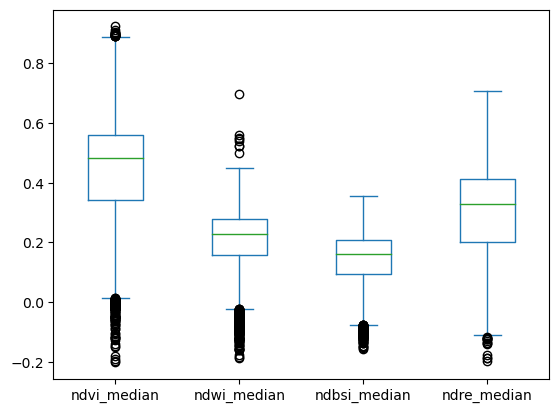

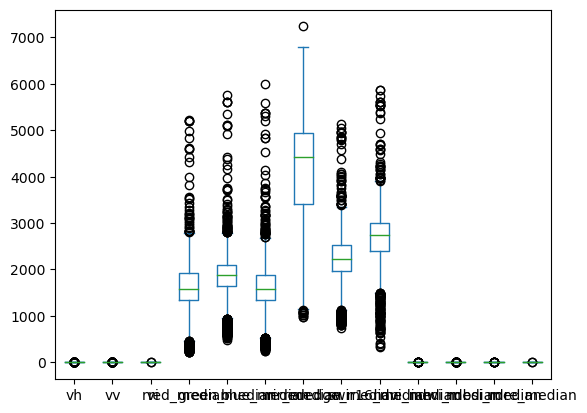

In [195]:
# Check boxplot before transforming
train_ts_data.filter(like='nd').plot.box()
sub_ts_data.plot.box()

In [196]:
columns_to_apply_log10 = 'vv,vh,red,green,blue,nir,rededge,swir16'.split(',')
train_ts_data.loc[:, train_ts_data.columns.str.contains('|'.join(columns_to_apply_log10))] = train_ts_data.loc[:, train_ts_data.columns.str.contains('|'.join(columns_to_apply_log10))].apply(lambda x: np.log10(x))
sub_ts_data.loc[:, sub_ts_data.columns.str.contains('|'.join(columns_to_apply_log10))] = sub_ts_data.loc[:, sub_ts_data.columns.str.contains('|'.join(columns_to_apply_log10))].apply(lambda x: np.log10(x))

train_ts_data['rvi'] = train_ts_data['rvi'].apply(lambda x:x**0.5)
sub_ts_data['rvi'] = sub_ts_data['rvi'].apply(lambda x:x**0.5)

In [197]:
def is_outlier(series, factor=1, print_range=False):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR*factor
    upper_bound = Q3 + 1.5 * IQR*factor
    if print_range:
        print(upper_bound, lower_bound)
    boolean_filter = (series < lower_bound) | (series > upper_bound)
    return pd.Series(np.where(boolean_filter,
                                       np.nan,
                                       series),
                              index=series.index)

train_ts_data    = train_ts_data.apply(is_outlier, args=[2]).interpolate().bfill().ffill()
sub_ts_data      = sub_ts_data.apply(  is_outlier, args=[2]).interpolate().bfill().ffill()

<AxesSubplot: >

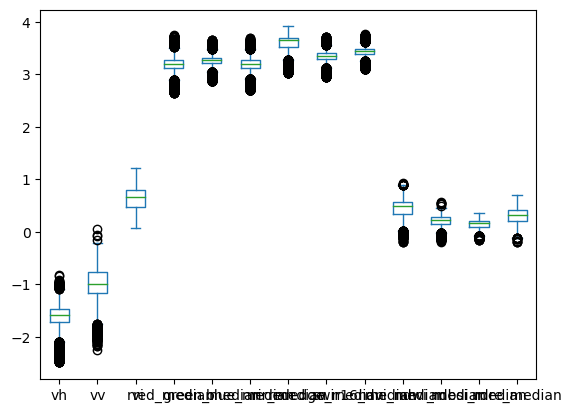

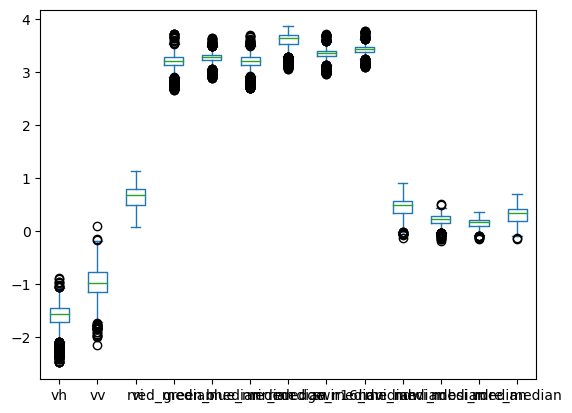

In [198]:
# Check boxplot after outlier filters
train_ts_data.plot.box()
sub_ts_data.plot.box()

470


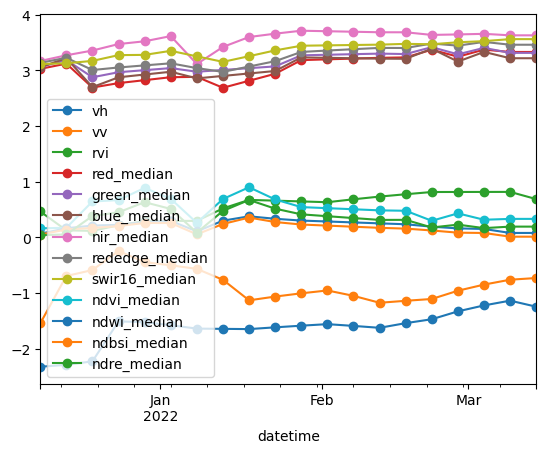

41


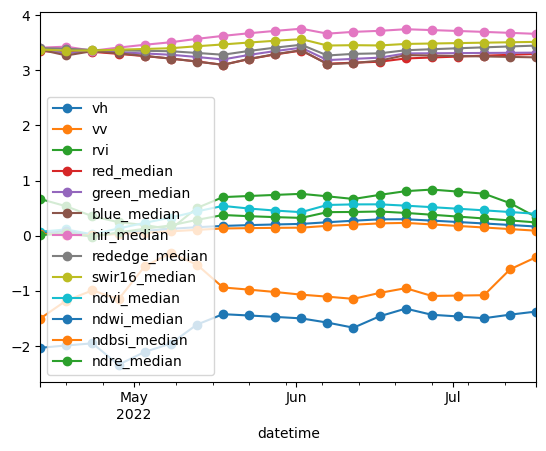

In [199]:
# Visualize data for one random sample
rand = np.random.randint(0, 556)
print(rand)
train_ts_data.loc[rand].plot(marker='o')
# [plt.axvline(train_const_data.loc[rand, i], c='k', ls='--', alpha=0.5) for i in ['start_of_harvest', 'date_of_harvest']];
plt.show();

# Visualize data for one random sample
rand = np.random.randint(0, 99)
print(rand)
sub_ts_data.loc[rand].plot(marker='o')
# [plt.axvline(sub_const_data.loc[rand, i], c='k', ls='--', alpha=0.5) for i in ['start_of_harvest', 'date_of_harvest']];
plt.show();

### Detect TS Anomalies

In [200]:
# # import torch
# import torch.nn as nn

# # Define a simple RNN model with one hidden layer
# class RNN(nn.Module):
#     def __init__(self, input_size, hidden_size, output_size):
#         super(RNN, self).__init__()
#         self.hidden_size = hidden_size
#         self.rnn = nn.LSTM(input_size, hidden_size, batch_first=True)
#         self.fc = nn.Linear(hidden_size, output_size)

#     def forward(self, x):
#         # Initialize hidden state
#         h0 = torch.zeros(1, x.size(0), self.hidden_size).to(x.device)
#         c0 = torch.zeros(1, x.size(0), self.hidden_size).to(x.device)

#         # Feed input sequence through the LSTM
#         out, _ = self.rnn(x, (h0, c0))

#         # Pass the output sequence through a fully connected layer
#         out = self.fc(out)

#         return out

# # Define a loss function that penalizes large deviations from the predicted values
# class AnomalyDetectionLoss(nn.Module):
#     def __init__(self, threshold):
#         super(AnomalyDetectionLoss, self).__init__()
#         self.threshold = threshold

#     def forward(self, y_pred, y_true):
#         errors = torch.abs(y_pred - y_true)
#         mask = errors > self.threshold
#         loss = torch.mean(torch.where(mask, errors, torch.zeros_like(errors)))
#         return loss

# # Define a training function that uses an optimizer to minimize the loss
# def train_model(model, train_loader, optimizer, loss_fn, num_epochs):
#     for epoch in range(num_epochs):
#         for i, (inputs) in enumerate(train_loader):
#             optimizer.zero_grad()

#             # Forward pass
#             outputs = model(inputs)
#             loss = loss_fn(outputs, inputs)

#             # Backward pass and optimization
#             loss.backward()
#             optimizer.step()

#             if (i+1) % 10 == 0:
#                 print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
#                       .format(epoch+1, num_epochs, i+1, len(train_loader), loss.item()), end='\r')

# # Define a function to detect anomalies in a time series
# def detect_anomalies(model, data, threshold):
#     inputs = torch.Tensor(data)
#     outputs = model(inputs)
#     print(inputs.shape, outputs.shape)
#     errors = torch.abs(outputs - inputs)
#     mask = errors > threshold
#     return mask.squeeze().detach().cpu().numpy()

# # Example usage:
# threshold = 3
# data = torch.Tensor(np.vstack([train_ts_data.values.reshape(557, 100, -1), sub_ts_data.values.reshape(100, 100, -1)])).to('cuda')
# model = RNN(input_size=data.shape[2], hidden_size=10, output_size=data.shape[2]).to('cuda')
# optimizer = torch.optim.Adam(model.parameters(), lr=10**-4)
# loss_fn = AnomalyDetectionLoss(threshold=threshold)
# train_loader = torch.utils.data.DataLoader(data, batch_size=1, shuffle=False)
# train_model(model, train_loader, optimizer, loss_fn, num_epochs=20)

In [201]:
# anomaly_mask_train = detect_anomalies(model, data[:557], threshold=threshold*0.35)
# anomaly_mask_sub   = detect_anomalies(model, data[557:], threshold=threshold*0.35)

In [202]:
# anomaly_mask_train_df = pd.DataFrame(anomaly_mask_train.reshape(train_ts_data.shape), index=train_ts_data.index, columns=train_ts_data.columns)
# anomaly_mask_sub_df   = pd.DataFrame(anomaly_mask_sub.reshape(sub_ts_data.shape)  , index=sub_ts_data.index  , columns=sub_ts_data.columns)

In [203]:
# # Join red, blue, green masks, and ndbi, etc, masks
# anomaly_mask_train_df[anomaly_mask_train_df.columns[3:8]] = anomaly_mask_train_df.iloc[:, 3:8].apply(np.logical_or.reduce, axis=1).to_frame().reindex(columns=anomaly_mask_train_df.columns[3:8])
# anomaly_mask_train_df[anomaly_mask_train_df.columns[9:]]  = anomaly_mask_train_df.iloc[:, 9: ].apply(np.logical_or.reduce, axis=1).to_frame().reindex(columns=anomaly_mask_train_df.columns[9:])
# anomaly_mask_train_df = anomaly_mask_train_df.ffill(axis=1)

# anomaly_mask_sub_df[anomaly_mask_sub_df.columns[3:8]] = anomaly_mask_sub_df.iloc[:, 3:8].apply(np.logical_or.reduce, axis=1).to_frame().reindex(columns=anomaly_mask_sub_df.columns[3:8])
# anomaly_mask_sub_df[anomaly_mask_sub_df.columns[9:]]  = anomaly_mask_sub_df.iloc[:, 9: ].apply(np.logical_or.reduce, axis=1).to_frame().reindex(columns=anomaly_mask_sub_df.columns[9:])
# anomaly_mask_sub_df = anomaly_mask_sub_df.ffill(axis=1)

In [204]:
# iterator = iter(range(0, 50))

In [205]:
# n = next(iterator)
# print(n)
# # n = 18
# # print(pd.DataFrame(anomaly_mask).stack().xs(n))
# for f in range(13):
#     plt.scatter(y=train_ts_data.iloc[:, f].xs(n).values, x=train_ts_data.iloc[:, f].xs(n).index, color=['gold' if x else 'blue' for x in anomaly_mask_train_df.xs(n).iloc[:, f]], zorder=100)
#     train_ts_data.iloc[:, f].xs(n).plot()
#     plt.title(train_ts_data.iloc[:, f].name)
#     plt.show();

In [206]:
# train_ts_data = train_ts_data.groupby(pd.Grouper(level=0)).apply(lambda x:x.rolling(3).median().bfill())
# sub_ts_data   = sub_ts_data.groupby(pd.Grouper(level=0)).apply(lambda x:x.rolling(3).median().bfill())

In [207]:
# # Fix and then fill nas
# train_ts_data = train_ts_data.groupby(pd.Grouper(level=0)).apply(lambda x:x.interpolate(limit_area='inside').ffill().bfill().fillna(0).rolling(3).median().bfill())
# sub_ts_data   = sub_ts_data.groupby(  pd.Grouper(level=0)).apply(lambda x:x.interpolate(limit_area='inside').ffill().bfill().fillna(0).rolling(3).median().bfill())

In [208]:
# n = next(iterator)
# print(n)
# n = 1
# # print(pd.DataFrame(anomaly_mask).stack().xs(n))
# for f in range(13):
#     plt.scatter(y=train_ts_data.iloc[:, f].xs(n).values, x=train_ts_data.iloc[:, f].xs(n).index, color=['gold' if x else 'blue' for x in anomaly_mask_train_df.xs(n).iloc[:, f]], zorder=100)
#     train_ts_data.iloc[:, f].xs(n).plot()
#     plt.title(train_ts_data.iloc[:, f].name)
#     plt.show();

### Check

In [209]:
# Check that all time_series are the same length
display(train_ts_data.groupby(level=0).count().iloc[:, 0].describe(),
        sub_ts_data.groupby(level=0).count().iloc[:, 0].describe())

count    557.0
mean      20.0
std        0.0
min       20.0
25%       20.0
50%       20.0
75%       20.0
max       20.0
Name: vh, dtype: float64

count    100.0
mean      20.0
std        0.0
min       20.0
25%       20.0
50%       20.0
75%       20.0
max       20.0
Name: vh, dtype: float64

In [210]:
assert 0 == train_ts_data.groupby(level=0).count().iloc[:, 0].describe()['std']
time_series_length = int(train_ts_data.groupby(level=0).count().iloc[:, 0].describe()['max'])
n_time_features = train_ts_data.shape[1]

In [211]:
display(train_ts_data.isna().sum(),
        sub_ts_data.isna().sum())

vh                0
vv                0
rvi               0
red_median        0
green_median      0
blue_median       0
nir_median        0
rededge_median    0
swir16_median     0
ndvi_median       0
ndwi_median       0
ndbsi_median      0
ndre_median       0
dtype: int64

vh                0
vv                0
rvi               0
red_median        0
green_median      0
blue_median       0
nir_median        0
rededge_median    0
swir16_median     0
ndvi_median       0
ndwi_median       0
ndbsi_median      0
ndre_median       0
dtype: int64

## Extra constant features (time series descriptors)

In [212]:
def ordinal_distribution(data, dx=3, dy=1, taux=1, tauy=1, return_missing=False, tie_precision=None):
    '''
    Returns
    -------
     : tuple
       Tuple containing two arrays, one with the ordinal patterns occurring in data 
       and another with their corresponding probabilities.
       
    Attributes
    ---------
    data : array 
           Array object in the format :math:`[x_{1}, x_{2}, x_{3}, \\ldots ,x_{n}]`
           or  :math:`[[x_{11}, x_{12}, x_{13}, \\ldots, x_{1m}],
           \\ldots, [x_{n1}, x_{n2}, x_{n3}, \\ldots, x_{nm}]]`.
    dx : int
         Embedding dimension (horizontal axis) (default: 3).
    dy : int
         Embedding dimension (vertical axis); it must be 1 for time series 
         (default: 1).
    taux : int
           Embedding delay (horizontal axis) (default: 1).
    tauy : int
           Embedding delay (vertical axis) (default: 1).
    return_missing: boolean
                    If `True`, it returns ordinal patterns not appearing in the 
                    symbolic sequence obtained from **data** are shown. If `False`,
                    these missing patterns (permutations) are omitted 
                    (default: `False`).
    tie_precision : int
                    If not `None`, **data** is rounded with `tie_precision`
                    number of decimals (default: `None`).
   
    '''
    def setdiff(a, b):
        '''
        Returns
        -------
        : array
            An array containing the elements in `a` that are not contained in `b`.
            
        Parameters
        ----------    
        a : tuples, lists or arrays
            Array in the format :math:`[[x_{100}, x_{22}, x_{23}, \\ldots, x_{2m}], 
            \\ldots, [x_{n1}, x_{n2}, x_{n3}, ..., x_{nm}]]`.
        b : tuples, lists or arrays
            Array in the format :math:`[[x_{100}, x_{22}, x_{23}, \\ldots, x_{2m}], 
            \\ldots, [x_{n1}, x_{n2}, x_{n3}, ..., x_{nm}]]`.
        '''

        a = np.asarray(a).astype('int64')
        b = np.asarray(b).astype('int64')

        _, ncols = a.shape

        dtype={'names':['f{}'.format(i) for i in range(ncols)],
            'formats':ncols * [a.dtype]}

        C = np.setdiff1d(a.view(dtype), b.view(dtype))
        C = C.view(a.dtype).reshape(-1, ncols)

        return(C)

    try:
        ny, nx = np.shape(data)
        data   = np.array(data)
    except:
        nx     = np.shape(data)[0]
        ny     = 1
        data   = np.array([data])

    if tie_precision is not None:
        data = np.round(data, tie_precision)

    partitions = np.concatenate(
        [
            [np.concatenate(data[j:j+dy*tauy:tauy,i:i+dx*taux:taux]) for i in range(nx-(dx-1)*taux)] 
            for j in range(ny-(dy-1)*tauy)
        ]
    )

    symbols = np.apply_along_axis(np.argsort, 1, partitions)
    symbols, symbols_count = np.unique(symbols, return_counts=True, axis=0)

    probabilities = symbols_count/len(partitions)

    if return_missing==False:
        return symbols, probabilities
    
    else:
        all_symbols   = list(map(list,list(itertools.permutations(np.arange(dx*dy)))))
        miss_symbols  = setdiff(all_symbols, symbols)
        symbols       = np.concatenate((symbols, miss_symbols))
        probabilities = np.concatenate((probabilities, np.zeros(miss_symbols.__len__())))
        
        return symbols, probabilities

In [213]:
def permutation_entropy(data, dx=3, dy=1, taux=1, tauy=1, base=2, normalized=True, probs=False, tie_precision=None):
    '''
    Returns Permutation Entropy
    Attributes:
    data : array
           Array object in the format :math:`[x_{1}, x_{2}, x_{3}, \\ldots ,x_{n}]`
           or  :math:`[[x_{11}, x_{12}, x_{13}, \\ldots, x_{1m}],
           \\ldots, [x_{n1}, x_{n2}, x_{n3}, \\ldots, x_{nm}]]`
           or an ordinal probability distribution (such as the ones returned by :func:`ordpy.ordinal_distribution`).
    dx :   int
           Embedding dimension (horizontal axis) (default: 3).
    dy :   int
           Embedding dimension (vertical axis); it must be 1 for time series (default: 1).
    taux : int
           Embedding delay (horizontal axis) (default: 1).
    tauy : int
           Embedding delay (vertical axis) (default: 1).
    base : str, int
           Logarithm base in Shannon's entropy. Either 'e' or 2 (default: 2).
    normalized: boolean
                If `True`, permutation entropy is normalized by its maximum value 
                (default: `True`). If `False`, it is not.
    probs : boolean
            If `True`, assumes **data** is an ordinal probability distribution. If 
            `False`, **data** is expected to be a one- or two-dimensional 
            array (default: `False`). 
    tie_precision : int
                    If not `None`, **data** is rounded with `tie_precision`
                    number of decimals (default: `None`).
    '''
    if not probs:
        _, probabilities = ordinal_distribution(data, dx, dy, taux, tauy, return_missing=False, tie_precision=tie_precision)
    else:
        probabilities = np.asarray(data)
        probabilities = probabilities[probabilities>0]

    if normalized==True and base in [2, '2']:        
        smax = np.log2(float(np.math.factorial(dx*dy)))
        s    = -np.sum(probabilities*np.log2(probabilities))
        return s/smax
         
    elif normalized==True and base=='e':        
        smax = np.log(float(np.math.factorial(dx*dy)))
        s    = -np.sum(probabilities*np.log(probabilities))
        return s/smax
    
    elif normalized==False and base in [2, '2']:
        return -np.sum(probabilities*np.log2(probabilities))
    else:
        return -np.sum(probabilities*np.log(probabilities))

In [222]:
def generate_stastical_features_fix(group):
    '''
    Returns a  list of statistical features such as min,max,range,mean,auto-correlation,permutation entropy for each of the features
    Attributes:
    dataframe - DataFrame consisting of VV,VH and VV/VH for a time period
    '''
    out = group.agg(['min', 'max', 'ptp', 'mean', 'std'])

    for i in [0]:
        out.loc[f'auto_corr_{i+1}', :] = group.apply(lambda x:sm.tsa.acf(x)[i+1])

    out.loc['permut_entropy', :] = group.apply(lambda x:permutation_entropy(x, dx=6, base=2, normalized=True))

    from statsmodels.tsa.stattools import adfuller
    out.loc['adfuller', :] = group.apply(lambda x: adfuller(x)[1] <= 0.05).astype(int)
    
    from scipy.stats import skew, kurtosis
    out.loc['kurtosis', :] = group.apply(kurtosis)

    out.loc['skewness', :] = group.apply(skew)

    # from hurst import compute_Hc
    # out.loc['hurst', :] = group.apply(lambda x: compute_Hc(x)[0])

    from scipy.signal import welch
    out.loc['welch_periodogram', :] = group.apply(lambda x: welch(x, nperseg = 7)[1].mean())

    from antropy import spectral_entropy
    out.loc['spectral_entropy', :] = group.apply(lambda x: spectral_entropy(x, sf=1, method='fft'))

    return out

In [223]:
descriptors_train = train_ts_data.groupby(level=0).progress_apply(lambda x:generate_stastical_features_fix(x))
descriptors_sub   = sub_ts_data.groupby  (level=0).progress_apply(lambda x:generate_stastical_features_fix(x))

  0%|          | 0/557 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

In [224]:
multicols_names = descriptors_train.unstack().columns.map('_'.join)

descriptors_train = descriptors_train.unstack().droplevel(0, axis=1)
descriptors_train.columns = multicols_names
descriptors_sub   = descriptors_sub.unstack().droplevel(0, axis=1)
descriptors_sub.columns   = multicols_names

display(descriptors_train.head(2), descriptors_sub.head(2))

,vh_min,vh_max,vh_ptp,vh_mean,vh_std,vh_auto_corr_1,vh_permut_entropy,vh_adfuller,vh_kurtosis,vh_skewness,...,ndre_median_ptp,ndre_median_mean,ndre_median_std,ndre_median_auto_corr_1,ndre_median_permut_entropy,ndre_median_adfuller,ndre_median_kurtosis,ndre_median_skewness,ndre_median_welch_periodogram,ndre_median_spectral_entropy
index,,,,,,,,,,,,,,,,,,,,,
0,-2.227234,-1.461791,0.765443,-1.700036,0.248757,0.746767,0.378208,0.0,0.256126,-1.239160,...,0.625879,0.264481,0.196941,0.896316,0.211227,0.0,-1.049988,-0.635207,0.003691,1.232802
1,-1.714009,-1.090269,0.623740,-1.390570,0.155056,0.635903,0.411605,0.0,-0.564201,-0.137009,...,0.443691,0.275321,0.152664,0.880604,0.302671,0.0,-1.073771,-0.694828,0.002713,1.407610


,vh_min,vh_max,vh_ptp,vh_mean,vh_std,vh_auto_corr_1,vh_permut_entropy,vh_adfuller,vh_kurtosis,vh_skewness,...,ndre_median_ptp,ndre_median_mean,ndre_median_std,ndre_median_auto_corr_1,ndre_median_permut_entropy,ndre_median_adfuller,ndre_median_kurtosis,ndre_median_skewness,ndre_median_welch_periodogram,ndre_median_spectral_entropy
index,,,,,,,,,,,,,,,,,,,,,
0,-2.289285,-1.310438,0.978847,-1.647605,0.306602,0.757823,0.273581,0.0,-0.200842,-1.012147,...,0.468540,0.303757,0.125578,0.528394,0.397557,0.0,0.304603,-0.962316,0.005512,1.511666
1,-2.278724,-1.239641,1.039083,-1.677527,0.230646,0.615716,0.411605,0.0,1.233447,-0.976471,...,0.462968,0.309389,0.154808,0.762219,0.411605,0.0,-0.242953,-1.123766,0.009492,1.899029


In [225]:
train_const_data = pd.concat([train_const_data, descriptors_train], axis=1).drop(['start_of_harvest', 'target_class', 'date_of_harvest'], axis=1)
sub_const_data   = pd.concat([sub_const_data  , descriptors_sub], axis=1).drop(['start_of_harvest', 'date_of_harvest'], axis=1)
train_const_data.head(2)

,field_size,rice_yield,season_WS,intensity_T,dayofyear_of_harvest,vh_min,vh_max,vh_ptp,vh_mean,vh_std,...,ndre_median_ptp,ndre_median_mean,ndre_median_std,ndre_median_auto_corr_1,ndre_median_permut_entropy,ndre_median_adfuller,ndre_median_kurtosis,ndre_median_skewness,ndre_median_welch_periodogram,ndre_median_spectral_entropy
0,3.40,5500,0,1,196,-2.227234,-1.461791,0.765443,-1.700036,0.248757,...,0.625879,0.264481,0.196941,0.896316,0.211227,0.0,-1.049988,-0.635207,0.003691,1.232802
1,2.43,6000,0,1,196,-1.714009,-1.090269,0.623740,-1.390570,0.155056,...,0.443691,0.275321,0.152664,0.880604,0.302671,0.0,-1.073771,-0.694828,0.002713,1.407610


c:\Users\leo_a\anaconda3\envs\ey-challenge\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


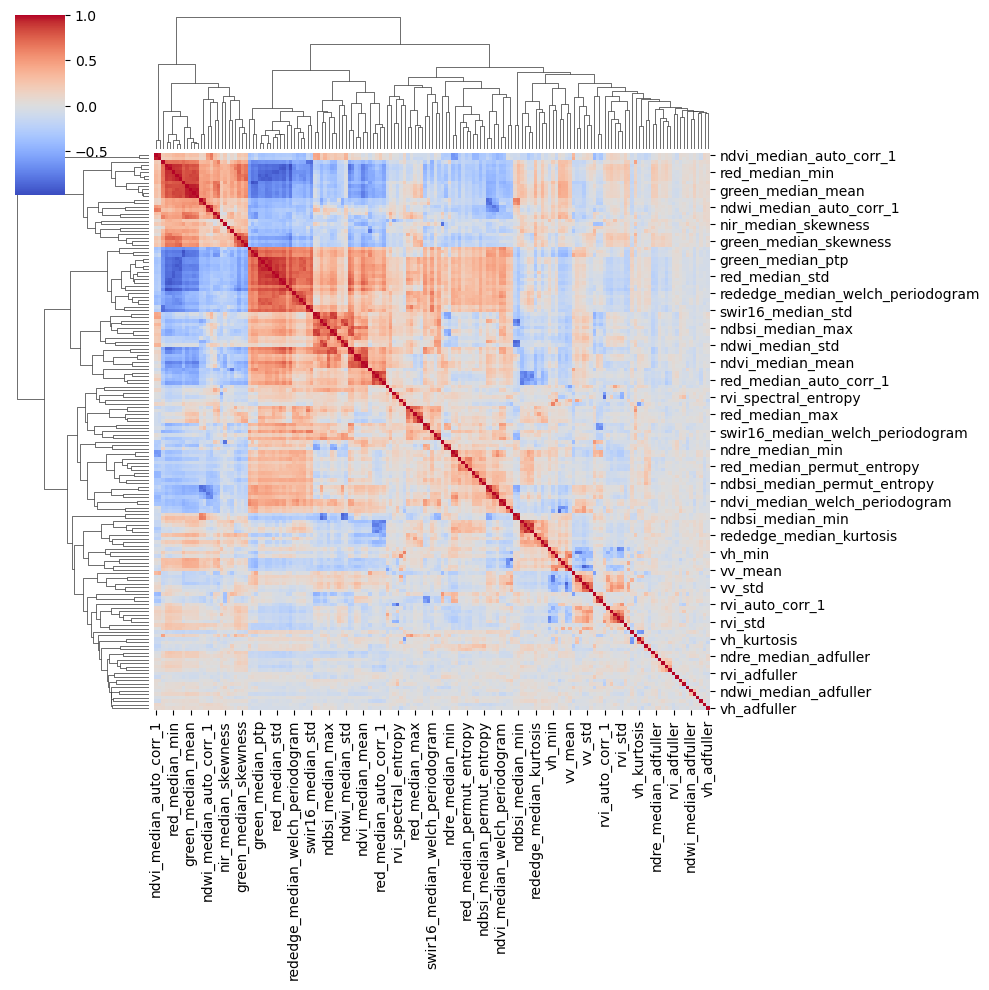

In [226]:
sns.clustermap(train_const_data.corr(), cmap='coolwarm')

In [232]:
train_const_data.isna().sum().sum(), sub_const_data.isna().sum().sum()

(0, 0)

In [233]:
train_const_data = train_const_data.fillna(0)
sub_const_data   = sub_const_data.fillna(0)

In [234]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectPercentile, f_regression
scaler = StandardScaler()
selector = SelectPercentile(f_regression, percentile=80)
selector.fit(scaler.fit_transform(train_const_data.drop('rice_yield', axis=1)), train_const_data.rice_yield)

SelectPercentile(percentile=80,
                 score_func=<function f_regression at 0x0000016BD8761480>)

<AxesSubplot: >

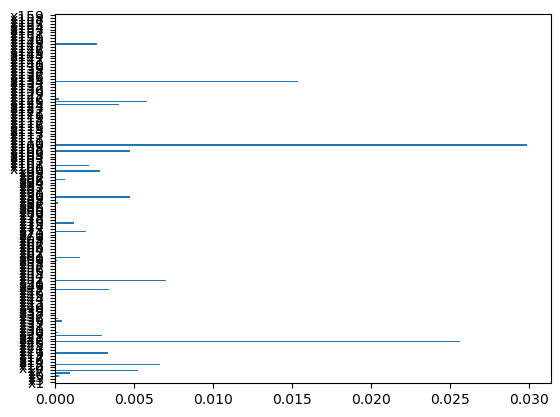

In [235]:
pd.Series(selector.pvalues_[selector.get_support()], index=selector.get_feature_names_out()).plot.barh()

In [236]:
train_const_data_pca = train_const_data.drop('rice_yield', axis=1)
sub_const_data_pca  = sub_const_data

# train_const_data_pca = pd.DataFrame(columns=train_const_data.drop('rice_yield', axis=1).columns[selector.get_support()], data=selector.transform(train_const_data.drop('rice_yield', axis=1)))
# sub_const_data_pca   = pd.DataFrame(columns=sub_const_data.columns[selector.get_support()], data=selector.transform(sub_const_data))

# Create Model

In [278]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset, TensorDataset

def TrainTorch(xtrain, ytrain, val_data=(None, None), n_epochs=200, model='convnet'):
    
    # Set boolean for validating
    validating = True
    if val_data==(None, None):
        validating = False

    # To CUDA
    xtrain = xtrain.to('cuda')
    ytrain = ytrain.to('cuda')
    if validating:
        val_data = (val_data[0].to('cuda'), val_data[1].to('cuda'))
    
    # From Torch Tensor to Torch Dataset
    dataset_train = TensorDataset(xtrain, ytrain)
    if validating:
        dataset_val   = TensorDataset(*list(val_data))
        
    class TST(nn.Module):
        def __init__(self, seq_len, n_features, n_encoder_layers=1, nhead=4, d_model=4, dim_feedforward=112):
            super(TST, self).__init__()
            self.seq_len = seq_len
            self.n_features = n_features

            self.embedding = nn.Linear(n_features, d_model)

            self.positional_encoding = nn.Parameter(torch.zeros(seq_len, 1, d_model))

            encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, dim_feedforward=dim_feedforward)
            self.encoder = nn.TransformerEncoder(encoder_layer, num_layers=n_encoder_layers)

            self.flatten = nn.Flatten()

        def forward(self, x):
            # x has shape (batch_size, seq_len, n_features)
            x = self.embedding(x)
            x = x.permute(1, 0, 2)

            # add positional encoding
            x = x + self.positional_encoding[:self.seq_len, :, :]

            # permute input for transformer layer

            # apply transformer encoder
            x = self.encoder(x)

            # permute output to original shape
            x = x.permute(1, 0, 2)

            # flatten output
            # x = self.flatten(x)
        
            return x
        
    # class ConvNet
    class ConvNet(nn.Module):
        def __init__(self, n_features, time_series_length):
            super(ConvNet, self).__init__()
            n_total_features = n_features
            n_features = n_time_features
            feature_map_depth1 = 8
            
            kernel_size = 5
            self.padding_size = kernel_size // 2

            self.transformer = TST(time_series_length, feature_map_depth1)
            self.conv = nn.Conv1d(n_total_features, feature_map_depth1, kernel_size=kernel_size, stride=1, padding=0)
            self.conv2 = nn.Conv1d(feature_map_depth1, feature_map_depth1, kernel_size=kernel_size, stride=1, padding=0)
            self.globalconv = nn.Conv1d(feature_map_depth1, feature_map_depth1, kernel_size=time_series_length, stride=1, padding=0)
            
            self.drop = nn.Dropout(0.25)
            self.relu = nn.ReLU()
            self.pool = nn.MaxPool1d(2)
            
            n_neurons = 512
            self.fc1 = nn.Linear((n_total_features - n_features)*0 + feature_map_depth1*1, n_neurons)
            self.fc2 = nn.Linear(n_neurons, n_neurons)
            
            self.out = nn.Linear(n_neurons, 1)
            
        def forward(self, x, return_encoding=False):
            
            # x_const = torch.mean(x[:, :, :-n_time_features], dim=1)
            # x = x[:, :, -n_time_features:]

            x = x.permute(0, 2, 1) # (Para conv1d tiene que entrar batch size, features, seq_length

            # x = x.permute(0, 2, 1)
            # x = self.transformer(x)
            # x = x.permute(0, 2, 1)
            
            x = F.pad(x, (self.padding_size, self.padding_size), mode='circular')
            x = self.relu(self.conv(x))

            x = F.pad(x, (self.padding_size, self.padding_size), mode='circular')
            x = self.relu(self.conv2(x))
            # x = self.relu(self.conv2(x))
            # x = self.relu(self.conv2(x))
            
            # Max Global Pooling         
            # x = self.globalconv(x).squeeze(axis=2)
            # x = self.relu(x)
            # x = torch.max(x, dim=2)[0]
            # x = torch.mean(x, dim=2)
            # x = torch.flatten(x, 1, 2)

            encoding = x

            # x = torch.concat([x_const, x], dim=1)
            x = self.fc1(x)
            x = self.relu(x)
            x = self.drop(x)
            x = self.fc2(x)
            x = self.relu(x)
            x = self.out(x)
            
            if return_encoding:
                return x, encoding
            else:
                return x
        
    class TransformerNet(nn.Module):
        def __init__(self, input_size, output_size, num_layers, hidden_size, hidden_size_transformer, num_heads, dropout):
            super(TransformerNet, self).__init__()
            input_size = n_time_features
            self.embedding = nn.Linear(input_size, hidden_size)
            self.pos_embedding = nn.Embedding(time_series_length, hidden_size) # positional embedding
            self.transformer_encoder_layer = nn.TransformerEncoderLayer(hidden_size, num_heads, hidden_size_transformer, dropout, batch_first=True, norm_first=True)
            self.transformer_encoder = nn.TransformerEncoder(self.transformer_encoder_layer, num_layers)
            self.fc1 = nn.Linear(hidden_size, hidden_size*2)
            self.fc2 = nn.Linear(hidden_size*2, hidden_size*4)
            self.fc3 = nn.Linear(hidden_size*4, hidden_size*2)
            self.relu = nn.ReLU()
            self.out = nn.Linear(hidden_size*2, output_size)

        def forward(self, x, return_encoding=False):            
            x = x[:, :, -n_time_features:]
            seq_length = x.shape[1]
            pos = torch.arange(seq_length).unsqueeze(0).repeat(x.shape[0], 1).to('cuda') # positional indices
            x = self.embedding(x) + self.pos_embedding(pos)
            x = self.transformer_encoder(x)
            x = F.max_pool1d(x.permute(0, 2, 1), seq_length).squeeze() # global pooling
            encodings = x
            x = self.relu(self.fc1(x))
            x = self.relu(self.fc2(x))
            x = self.relu(self.fc3(x))
            x = self.out(x)
            if return_encoding: return x, encodings
            else: return x
        
    if model =='transformer':
        model = TransformerNet(input_size=n_features, output_size=1, num_layers=1, hidden_size=32, hidden_size_transformer=512, num_heads=4, dropout=0.1).to('cuda')
    elif model == 'convnet':
        model = ConvNet(n_features, time_series_length).to('cuda')
    else:
        raise Exception('Model has to be "convnet" or "transformer".')
    
    # Training parameters
    # optimizer = torch.optim.Adagrad(model.parameters(), lr=10**(-3.0), weight_decay=10**(-3), maximize=True)
    optimizer = torch.optim.AdamW(    model.parameters(), lr=10**(-4.0), weight_decay=10**(-1), maximize=False) # AdamW, 1 wd, 3.7 lr
    # optimizer = torch.optim.Adam(   model.parameters(), lr=10**(-4.0), weight_decay=10**(-2), maximize=False)
    # optimizer = torch.optim.SGD(    model.parameters(), lr=10**(-2.0), weight_decay=10**(-3), maximize=True)
    
    def smooth_r2_loss(y_pred, y_true, smooth_weight=0.3):
        ss_res = torch.sum(torch.square(y_true - y_pred))
        ss_tot = torch.sum(torch.square(y_true - torch.mean(y_true)))
        r2 = 1 - (ss_res + smooth_weight) / (ss_tot + smooth_weight)
        return r2
    criterion = nn.MSELoss()
    # criterion = smooth_r2_loss
    batch_size = 64
    epochs = n_epochs

    
    # Dataset to Dataloader
    dataloader_train = DataLoader(dataset_train    , batch_size=batch_size, shuffle=True)
    n_batches_train = (len(dataset_train) - 1)//batch_size+1
    if validating:
        dataloader_val   = DataLoader(dataset_val      , batch_size=batch_size, shuffle=True)
        n_batches_val   = (len(dataset_val  ) - 1)//batch_size+1
    else:
        n_batches_val = 1


    from sklearn.metrics import r2_score

    # Instantiate validation metrics
    stopping_counter = 0
    best_val_r2 = -np.inf

    # Training
    for epoch_n, epoch in tqdm(enumerate(range(epochs)), total=epochs):

        train_loss = 0.0
        model.train()
        for i, (x_, y_) in enumerate(dataloader_train):

            preds = model(x_)

            # Compute the loss
            loss = criterion(preds, y_)

            # Update the weights
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        model.eval()
        val_r2 = 0.0
        if validating:

            for (x__, y__) in dataloader_val:

                # Forward Pass
                preds = model(x__)

                # Find the R2 score
                r2 = r2_score(y__.detach().cpu().numpy(), preds.detach().cpu().numpy())

                # Calculate R2 score
                val_r2 += r2

            patience = 20
            if val_r2 <= best_val_r2:
                stopping_counter += 1
                if stopping_counter == patience:
                    print(f'{stopping_counter} time(s) has the R2 score not improved. Finishing training...\n',
                        f'best epoch: {epoch_n - patience} "Best" training loss: {round(best_train_loss/n_batches_train, 4)} best val_R2: {np.round(best_val_r2/n_batches_val, 4)}'
                         )
                    break
            else:
                best_val_r2 = val_r2
                best_train_loss = train_loss
                best_model = model
                stopping_counter = 0

        print(f'Training loss: {train_loss/n_batches_train:.4f}', 
        f'Validation R2 score: {val_r2/n_batches_val:.4f}',
        f'Stopping counter: {stopping_counter:02d}    ',
        end='\r')

    if validating:
        return best_model, best_val_r2/n_batches_val
    else:
        return model

## Prepare Data for Training

In [279]:
# Prepare data for training

# concat ts data with constant features
x = pd.concat([train_const_data_pca, train_ts_data.reset_index(level=1)], axis=1)\
.pipe(lambda x:x.set_index([x.index, 'datetime'])).drop(['season_WS'], axis=1)
xsub = pd.concat([sub_const_data_pca, sub_ts_data.reset_index(level=1)], axis=1)\
.pipe(lambda x:x.set_index([x.index, 'datetime'])).drop(['season_WS'], axis=1)

assert (x.columns == xsub.columns).all()

y = train_const_data.rice_yield.groupby(level=0).first().values.reshape(-1, 1)

# Reshape time series
n_samples = len(x)//time_series_length
time_series_length = time_series_length
n_features = x.shape[1]

# Convert to numpy array and reshape (n, length, features)
x    = x.values.reshape(n_samples, time_series_length, n_features)
xsub = xsub.values.reshape(  len(xsub.index.levels[0]), time_series_length, n_features)

display(x.shape, y.shape, xsub.shape)

(557, 20, 172)

(557, 1)

(100, 20, 172)

In [280]:
rand_state = np.random.randint(1, 373737)
rand_state = 190967 # buena correlacion con leaderboard
print(rand_state)

# Split test set
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
splitter = StratifiedShuffleSplit(1, random_state=rand_state, test_size=0.2)
idx_fulltrain, idx_test = list(splitter.split(x, crop_yield_data.target_class))[0]
# Make splits
xfulltrain = x[idx_fulltrain]
yfulltrain = y[idx_fulltrain]
xtest      = x[idx_test]
ytest      = y[idx_test]
target_fulltrain = crop_yield_data.target_class.loc[idx_fulltrain]
target_test      = crop_yield_data.target_class.loc[idx_test]

# Use train set for cross-validation
from sklearn.model_selection import KFold, StratifiedKFold
def KFoldTraining(x_, y_, n_splits=3, is_sklearn=False, model_to_train=None, **kwargs):

    # K folds
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=rand_state+2)
    kfolds = list(kfold.split(x_, y_))
    
    # For each fold, scale data, train and append models
    models = []
    for i, fold in enumerate(kfolds):
        # Splitting
        train_idx, val_idx = fold[0], fold[1]
        xval      = x_[val_idx]
        yval      = y_[val_idx]
        xtrain    = x_[train_idx]
        ytrain    = y_[train_idx]
        
        # Add noise to ytrain
        # ytrain = ytrain + np.random.normal(0, 200, size=ytrain.shape)
        
        if not is_sklearn:
            # Scaling
            # Instantiate scalers
            from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer, RobustScaler
            scaler_x = StandardScaler()
            scaler_y = StandardScaler()
            xtrain = scaler_x.fit_transform(xtrain.reshape(-1, xtrain.shape[2])).reshape(xtrain.shape)
            xval   = scaler_x.transform(xval.reshape(-1, xval.shape[2])).reshape(xval.shape)
            ytrain  = scaler_y.fit_transform(ytrain)
            yval    = scaler_y.transform(yval)
        
        
            # Cast to Tensors
            xtrain = torch.Tensor(xtrain)
            ytrain = torch.Tensor(ytrain)
            xval   = torch.Tensor(xval)
            yval   = torch.Tensor(yval)

            # Train and append model
            models.append(TrainTorch(xtrain, ytrain, (xval, yval), **kwargs))
        else:
            models.append(model_to_train.fit(xtrain, ytrain, eval_set=[(xval, yval)], early_stopping_rounds=10, verbose=100))
        
    return models

def FullDataTraining(x, y, **kwargs):
    # Scaling
    from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer, RobustScaler
    scaler_x = StandardScaler()
    scaler_y = StandardScaler()
    x    = scaler_x.fit_transform(x.reshape(-1, x.shape[2])).reshape(x.shape)
    y    = scaler_y.fit_transform(y)

    # Cast to Tensors
    x    = torch.Tensor(x)
    y    = torch.Tensor(y)

    # Train and append model
    return TrainTorch(x, y, **kwargs)

190967


## Train on training set

In [281]:
models_losses = KFoldTraining(xfulltrain, yfulltrain, model='convnet', n_epochs=400)

models = np.array(models_losses)[:, 0]
r2_scores = np.array(models_losses)[:, 1]

print('Average R2 on k-fold:' , r2_scores.mean())

  0%|          | 0/400 [00:00<?, ?it/s]

20 time(s) has the R2 score not improved. Finishing training...ter: 19    
 best epoch: 22 "Best" training loss: 0.2676 best val_R2: 0.6647


  0%|          | 0/400 [00:00<?, ?it/s]

20 time(s) has the R2 score not improved. Finishing training...ter: 19    
 best epoch: 23 "Best" training loss: 0.2544 best val_R2: 0.6838


  0%|          | 0/400 [00:00<?, ?it/s]

20 time(s) has the R2 score not improved. Finishing training...ter: 19     
 best epoch: 28 "Best" training loss: 0.2341 best val_R2: 0.5895
Average R2 on k-fold: 0.6460210091757599


In [66]:
model = []
for i in np.linspace(20, 40, 10, dtype=int):
    model.append(FullDataTraining(xfulltrain, yfulltrain, n_epochs=i))
model = np.array(model)

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/37 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

In [67]:
models_losses_transformer = KFoldTraining(xfulltrain, yfulltrain, 10, model='transformer')

models_tr = np.array(models_losses_transformer)[:, 0]
r2_scores = np.array(models_losses_transformer)[:, 1]
print('Average R2 on k-fold:' , r2_scores.mean())

  0%|          | 0/200 [00:00<?, ?it/s]

20 time(s) has the R2 score not improved. Finishing training...ter: 19     
 best epoch: 30 "Best" training loss: 0.3329 best val_R2: 0.6597


  0%|          | 0/200 [00:00<?, ?it/s]

20 time(s) has the R2 score not improved. Finishing training...ter: 19     
 best epoch: 49 "Best" training loss: 0.3075 best val_R2: 0.6452


  0%|          | 0/200 [00:00<?, ?it/s]

20 time(s) has the R2 score not improved. Finishing training...ter: 19    
 best epoch: 24 "Best" training loss: 0.3145 best val_R2: 0.6161


  0%|          | 0/200 [00:00<?, ?it/s]

20 time(s) has the R2 score not improved. Finishing training...ter: 19     
 best epoch: 70 "Best" training loss: 0.3165 best val_R2: 0.725


  0%|          | 0/200 [00:00<?, ?it/s]

20 time(s) has the R2 score not improved. Finishing training...ter: 19    
 best epoch: 25 "Best" training loss: 0.3251 best val_R2: 0.7194


  0%|          | 0/200 [00:00<?, ?it/s]

20 time(s) has the R2 score not improved. Finishing training...ter: 19     
 best epoch: 22 "Best" training loss: 0.3263 best val_R2: 0.5867


  0%|          | 0/200 [00:00<?, ?it/s]

20 time(s) has the R2 score not improved. Finishing training...ter: 19     
 best epoch: 78 "Best" training loss: 0.2915 best val_R2: 0.7267


  0%|          | 0/200 [00:00<?, ?it/s]

20 time(s) has the R2 score not improved. Finishing training...ter: 19    
 best epoch: 36 "Best" training loss: 0.3188 best val_R2: 0.6055


  0%|          | 0/200 [00:00<?, ?it/s]

20 time(s) has the R2 score not improved. Finishing training...ter: 19    
 best epoch: 57 "Best" training loss: 0.3087 best val_R2: 0.5684


  0%|          | 0/200 [00:00<?, ?it/s]

20 time(s) has the R2 score not improved. Finishing training...ter: 19    
 best epoch: 96 "Best" training loss: 0.2803 best val_R2: 0.7505
Average R2 on k-fold: 0.6603126234475131


In [68]:
model_tr = []
for i in np.linspace(30, 70, 10, dtype=int):
    model_tr.append(FullDataTraining(xfulltrain, yfulltrain, n_epochs=i, model='transformer'))
model_tr = np.array(model_tr)

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/47 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/61 [00:00<?, ?it/s]

  0%|          | 0/65 [00:00<?, ?it/s]

  0%|          | 0/70 [00:00<?, ?it/s]

KeyboardInterrupt: 

## Evaluate with test set

### Function and Scaling

In [ ]:
def MakePredictions(model, xtest, is_sklearn=False):
    if type(model) is np.ndarray or type(model) is list:
        kfold_preds = []
        for m in model:
            if 'Torch' not in str(type(m)):
                if len(xtest.shape) == 3:
                    xtest_enh = GetEncodings(xtest, model_tr, 'original')
                else:
                    xtest_enh = xtest
                kfold_preds.append(m.predict(xtest_enh).squeeze())
            else:
                if type(xtest) != torch.Tensor:
                    xtest_T = torch.Tensor(xtest)
                kfold_preds.append(m(xtest_T.to('cuda')).cpu().detach().numpy().squeeze())
        preds = np.mean(np.array(kfold_preds), 0)
    else:
        try:
            preds = model.predict(xtest).squeeze()
        except:
            if type(xtest) != torch.Tensor:
                xtest = torch.Tensor(xtest)
                preds = model(xtest.to('cuda')).cpu().detach().numpy().squeeze()

    return preds

def EvaluationPlot(model, xtest, ytest, title='', plot=False, **kwargs):
                   
    preds = MakePredictions(model, xtest, **kwargs)
    
    # comparison preds, real
    from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, r2_score as r2
    
    preds_df = pd.DataFrame(pd.concat([pd.Series(preds),
                                       pd.Series(ytest.squeeze())], axis=1))\
    .assign(error=lambda x:x[1] - x[0],
            mae=lambda x:mae(x[1], x[0]),
            mse=lambda x:np.sqrt(mse(x[1], x[0])),
            r2=lambda x:r2(x[1], x[0]))

    if plot:
        preds_df.pipe(lambda x:sns.regplot(data=x, x=x[1], y=x[0]))
        plt.plot(np.arange(preds_df[1].min(), preds_df[1].max()), np.arange(preds_df[1].min(), preds_df[1].max()), c='k', ls='-', alpha=0.35)
        plt.title(title)
        plt.show()
    print(title)
    display(preds_df.head(1))

In [ ]:
# Scalers for test set
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer, RobustScaler
scaler_x_fulltrain = StandardScaler()
scaler_y_fulltrain = StandardScaler()

xfulltrain = scaler_x_fulltrain.fit_transform(xfulltrain.reshape(-1, xfulltrain.shape[2])).reshape(xfulltrain.shape)
yfulltrain = scaler_y_fulltrain.fit_transform(yfulltrain)
xtest = scaler_x_fulltrain.transform(xtest.reshape(-1, xtest.shape[2])).reshape(xtest.shape)
ytest = scaler_y_fulltrain.transform(ytest)

scaler_x_sub = StandardScaler()
scaler_y_sub = StandardScaler()
scaler_x_sub.fit(x.reshape(-1, x.shape[2]))
scaler_y_sub.fit(y)
xsub = scaler_x_sub.transform(xsub.reshape(-1, xsub.shape[2])).reshape(xsub.shape)

In [ ]:
# Load 0.62 submission
ytrue = scaler_y_sub.transform(pd.read_csv('Version 11.csv').iloc[:, -1].rename('rice_yield').values.round(-1).reshape(-1, 1)).squeeze()

### sklearn benchmark

In [ ]:
def GetEncodings(x_basic, models, to_return='both'):
    originals = np.hstack([x_basic.mean(1), x_basic.max(1)])
    if to_return == 'original':
        return originals

    get_preds = lambda m:m(torch.Tensor(x_basic).to('cuda'), return_encoding=True)[1].cpu().detach().numpy()

    if type(models[0]) is not list and type(models[0]) is not np.ndarray: # If the list is a list of the same type of model, like a kfold training
        encodings = []
        for m in models:
            encodings.append(get_preds(m))
        encodings = np.array(encodings).mean(0)

    else: # if the list contains a list of lists of different models, get encodings of each and hstack them
        all_encodings = []
        for list_of_models in models:
            encodings = []
            for m in list_of_models:
                encodings.append(get_preds(m))
            encodings = np.array(encodings).mean(0)
            all_encodings.append(encodings)
        all_encodings = np.hstack(all_encodings)
        encodings = all_encodings
        
    if to_return=='both':
        return np.hstack([originals, encodings])      
    elif to_return=='encodings':
        return encodings
    else:
        raise Exception('to_return must be original, encodings or both')

In [ ]:
x_scaled = scaler_x_sub.transform(x.reshape(-1, x.shape[2])).reshape(x.shape)

In [ ]:
# from skopt import BayesSearchCV
# from skopt.space import Real, Categorical, Integer
# from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
# from xgboost import XGBRegressor
# from catboost import CatBoostRegressor
# from lightgbm import LGBMRegressor
# # Define the hyperparameter search space
# search_space = dict(
#     l2_leaf_reg = Real(10**-1, 10**2, prior='log-uniform', name='l2_leaf_reg'),
#     depth = Integer(3, 10, name='max_depth'),
#     random_strength = Integer(0, 10),
#     learning_rate = Real(10**-3, 10**0, prior='log-uniform')
# )
# sk_model_cat = CatBoostRegressor(n_estimators=200, verbose=100, task_type='GPU')

# optimizer_cat = BayesSearchCV(sk_model_cat, search_space, n_iter=20, verbose=1, scoring='r2')

# optimizer_cat.fit(xfulltrain_enhanced, yfulltrain)

# print('Optimal parameters:', optimizer_cat.best_params_)

# preds_cat = optimizer_cat.predict(xtest_enhanced)

# from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, r2_score as r2
# EvaluationPlot(optimizer_cat, xtest_enhanced, ytest)

In [ ]:
# sklearn benchmark
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

model_cat = CatBoostRegressor(n_estimators=500, learning_rate=10**-1.5, reg_lambda=10**1.4, verbose=1000, eval_metric='R2')
model_xgb = XGBRegressor(n_estimators=500, learning_rate=10**-1.7, reg_lambda=10**1.4)
model_lgbm = LGBMRegressor(n_estimators=500, learning_rate=10**-1.7, reg_lambda=10**1.4)
model_linear = LinearRegression()
model_gbm = GradientBoostingRegressor(n_estimators=200, learning_rate=10**-1.7)

which = 'original'
x_enhanced = GetEncodings(x_scaled, [model, model_tr], which)
xfulltrain_enhanced = GetEncodings(xfulltrain, [model, model_tr], which)
xtest_enhanced = GetEncodings(xtest, [model, model_tr], which)
xsub_enhanced = GetEncodings(xsub, [model, model_tr], which)

models_cat = KFoldTraining(xfulltrain_enhanced, yfulltrain, 10, is_sklearn=True, model_to_train=model_cat)
# models_2 = model_gbm.fit(xfulltrain_enhanced, yfulltrain)
models_xgb = KFoldTraining(xfulltrain_enhanced, yfulltrain, 5, is_sklearn=True, model_to_train=model_xgb)
models_lgbm = KFoldTraining(xfulltrain_enhanced, yfulltrain, 5, is_sklearn=True, model_to_train=model_lgbm)

0:	learn: 0.0175236	test: -0.0022314	best: -0.0022314 (0)	total: 183ms	remaining: 1m 31s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 0.6582526448
bestIteration = 203

Shrink model to first 204 iterations.
0:	learn: 0.0178296	test: -0.0939352	best: -0.0939352 (0)	total: 32.5ms	remaining: 16.2s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 0.6217071187
bestIteration = 226

Shrink model to first 227 iterations.
0:	learn: 0.0180680	test: -0.0078111	best: -0.0078111 (0)	total: 35.5ms	remaining: 17.7s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 0.6434672149
bestIteration = 236

Shrink model to first 237 iterations.
0:	learn: 0.0208884	test: -0.0900968	best: -0.0900968 (0)	total: 48.2ms	remaining: 24s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 0.6942115789
bestIteration = 319

Shrink model to first 320 iterations.
0:	learn: 0.0191155	test: 0.0153814	best: 0.0153814 (0)	total: 79.9ms	remaining: 39.9s
Stopped

c:\Users\leo_a\anaconda3\envs\ey-challenge\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.83782
[19]	validation_0-rmse:0.83052
[20]	validation_0-rmse:0.82325
[21]	validation_0-rmse:0.81597
[22]	validation_0-rmse:0.80938
[23]	validation_0-rmse:0.80253
[24]	validation_0-rmse:0.79576
[25]	validation_0-rmse:0.78910
[26]	validation_0-rmse:0.78341
[27]	validation_0-rmse:0.77740
[28]	validation_0-rmse:0.77132
[29]	validation_0-rmse:0.76577
[30]	validation_0-rmse:0.76048
[31]	validation_0-rmse:0.75523
[32]	validation_0-rmse:0.74989
[33]	validation_0-rmse:0.74520
[34]	validation_0-rmse:0.74022
[35]	validation_0-rmse:0.73557
[36]	validation_0-rmse:0.73088
[37]	validation_0-rmse:0.72638
[38]	validation_0-rmse:0.72183
[39]	validation_0-rmse:0.71777
[40]	validation_0-rmse:0.71340
[41]	validation_0-rmse:0.70951
[42]	validation_0-rmse:0.70536
[43]	validation_0-rmse:0.70160
[44]	validation_0-rmse:0.69742
[45]	validation_0-rmse:0.69340
[46]	validation_0-rmse:0.69001
[47]	validation_0-rmse:0.68628
[48]	validation_0-rmse:0.68302
[49]	validation_0-rmse:0.67975
[50]	val

c:\Users\leo_a\anaconda3\envs\ey-challenge\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\leo_a\anaconda3\envs\ey-challenge\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\leo_a\anaconda3\envs\ey-challenge\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


[79]	valid_0's l2: 0.411332
[80]	valid_0's l2: 0.410372
[81]	valid_0's l2: 0.409448
[82]	valid_0's l2: 0.40794
[83]	valid_0's l2: 0.406196
[84]	valid_0's l2: 0.405151
[85]	valid_0's l2: 0.403756
[86]	valid_0's l2: 0.403043
[87]	valid_0's l2: 0.401614
[88]	valid_0's l2: 0.400787
[89]	valid_0's l2: 0.399415
[90]	valid_0's l2: 0.398019
[91]	valid_0's l2: 0.397019
[92]	valid_0's l2: 0.39594
[93]	valid_0's l2: 0.394427
[94]	valid_0's l2: 0.393147
[95]	valid_0's l2: 0.392262
[96]	valid_0's l2: 0.391028
[97]	valid_0's l2: 0.389844
[98]	valid_0's l2: 0.389013
[99]	valid_0's l2: 0.387877
[100]	valid_0's l2: 0.386875
[101]	valid_0's l2: 0.386378
[102]	valid_0's l2: 0.385434
[103]	valid_0's l2: 0.384709
[104]	valid_0's l2: 0.383885
[105]	valid_0's l2: 0.382562
[106]	valid_0's l2: 0.382176
[107]	valid_0's l2: 0.381328
[108]	valid_0's l2: 0.380412
[109]	valid_0's l2: 0.380136
[110]	valid_0's l2: 0.379802
[111]	valid_0's l2: 0.379158
[112]	valid_0's l2: 0.378512
[113]	valid_0's l2: 0.378213
[114]	va

c:\Users\leo_a\anaconda3\envs\ey-challenge\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\leo_a\anaconda3\envs\ey-challenge\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\leo_a\anaconda3\envs\ey-challenge\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


[80]	valid_0's l2: 0.365206
[81]	valid_0's l2: 0.364055
[82]	valid_0's l2: 0.36296
[83]	valid_0's l2: 0.362103
[84]	valid_0's l2: 0.361039
[85]	valid_0's l2: 0.360099
[86]	valid_0's l2: 0.359178
[87]	valid_0's l2: 0.358153
[88]	valid_0's l2: 0.357398
[89]	valid_0's l2: 0.356568
[90]	valid_0's l2: 0.355775
[91]	valid_0's l2: 0.355165
[92]	valid_0's l2: 0.354696
[93]	valid_0's l2: 0.353726
[94]	valid_0's l2: 0.352963
[95]	valid_0's l2: 0.352176
[96]	valid_0's l2: 0.351298
[97]	valid_0's l2: 0.350731
[98]	valid_0's l2: 0.350198
[99]	valid_0's l2: 0.350108
[100]	valid_0's l2: 0.349762
[101]	valid_0's l2: 0.349009
[102]	valid_0's l2: 0.348008
[103]	valid_0's l2: 0.347158
[104]	valid_0's l2: 0.346896
[105]	valid_0's l2: 0.346637
[106]	valid_0's l2: 0.346021
[107]	valid_0's l2: 0.345525
[108]	valid_0's l2: 0.34444
[109]	valid_0's l2: 0.343873
[110]	valid_0's l2: 0.342923
[111]	valid_0's l2: 0.342586
[112]	valid_0's l2: 0.342401
[113]	valid_0's l2: 0.342233
[114]	valid_0's l2: 0.341652
[115]	v

c:\Users\leo_a\anaconda3\envs\ey-challenge\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\leo_a\anaconda3\envs\ey-challenge\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\leo_a\anaconda3\envs\ey-challenge\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


[80]	valid_0's l2: 0.42121
[81]	valid_0's l2: 0.419903
[82]	valid_0's l2: 0.418469
[83]	valid_0's l2: 0.41696
[84]	valid_0's l2: 0.415235
[85]	valid_0's l2: 0.41343
[86]	valid_0's l2: 0.412113
[87]	valid_0's l2: 0.411077
[88]	valid_0's l2: 0.40955
[89]	valid_0's l2: 0.408082
[90]	valid_0's l2: 0.407407
[91]	valid_0's l2: 0.405769
[92]	valid_0's l2: 0.40472
[93]	valid_0's l2: 0.404142
[94]	valid_0's l2: 0.403119
[95]	valid_0's l2: 0.402606
[96]	valid_0's l2: 0.401691
[97]	valid_0's l2: 0.401238
[98]	valid_0's l2: 0.400818
[99]	valid_0's l2: 0.399883
[100]	valid_0's l2: 0.399514
[101]	valid_0's l2: 0.398825
[102]	valid_0's l2: 0.39822
[103]	valid_0's l2: 0.397596
[104]	valid_0's l2: 0.396811
[105]	valid_0's l2: 0.396093
[106]	valid_0's l2: 0.395751
[107]	valid_0's l2: 0.394921
[108]	valid_0's l2: 0.394724
[109]	valid_0's l2: 0.394172
[110]	valid_0's l2: 0.393553
[111]	valid_0's l2: 0.392776
[112]	valid_0's l2: 0.391648
[113]	valid_0's l2: 0.391253
[114]	valid_0's l2: 0.390515
[115]	valid

c:\Users\leo_a\anaconda3\envs\ey-challenge\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\leo_a\anaconda3\envs\ey-challenge\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\leo_a\anaconda3\envs\ey-challenge\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


[44]	valid_0's l2: 0.467904
[45]	valid_0's l2: 0.464233
[46]	valid_0's l2: 0.459247
[47]	valid_0's l2: 0.455806
[48]	valid_0's l2: 0.45198
[49]	valid_0's l2: 0.448757
[50]	valid_0's l2: 0.445091
[51]	valid_0's l2: 0.442257
[52]	valid_0's l2: 0.438834
[53]	valid_0's l2: 0.436841
[54]	valid_0's l2: 0.433405
[55]	valid_0's l2: 0.430254
[56]	valid_0's l2: 0.428007
[57]	valid_0's l2: 0.425469
[58]	valid_0's l2: 0.423216
[59]	valid_0's l2: 0.420883
[60]	valid_0's l2: 0.418922
[61]	valid_0's l2: 0.416412
[62]	valid_0's l2: 0.414756
[63]	valid_0's l2: 0.412712
[64]	valid_0's l2: 0.411281
[65]	valid_0's l2: 0.409141
[66]	valid_0's l2: 0.407746
[67]	valid_0's l2: 0.40631
[68]	valid_0's l2: 0.404415
[69]	valid_0's l2: 0.402578
[70]	valid_0's l2: 0.400718
[71]	valid_0's l2: 0.398671
[72]	valid_0's l2: 0.397954
[73]	valid_0's l2: 0.396482
[74]	valid_0's l2: 0.394531
[75]	valid_0's l2: 0.393162
[76]	valid_0's l2: 0.391481
[77]	valid_0's l2: 0.39021
[78]	valid_0's l2: 0.38866
[79]	valid_0's l2: 0.387

c:\Users\leo_a\anaconda3\envs\ey-challenge\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\leo_a\anaconda3\envs\ey-challenge\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\leo_a\anaconda3\envs\ey-challenge\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


[34]	valid_0's l2: 0.567344
[35]	valid_0's l2: 0.56073
[36]	valid_0's l2: 0.554398
[37]	valid_0's l2: 0.54821
[38]	valid_0's l2: 0.542097
[39]	valid_0's l2: 0.536697
[40]	valid_0's l2: 0.530989
[41]	valid_0's l2: 0.525616
[42]	valid_0's l2: 0.520248
[43]	valid_0's l2: 0.515552
[44]	valid_0's l2: 0.510893
[45]	valid_0's l2: 0.506194
[46]	valid_0's l2: 0.501431
[47]	valid_0's l2: 0.497218
[48]	valid_0's l2: 0.492921
[49]	valid_0's l2: 0.489134
[50]	valid_0's l2: 0.485357
[51]	valid_0's l2: 0.482199
[52]	valid_0's l2: 0.479168
[53]	valid_0's l2: 0.476095
[54]	valid_0's l2: 0.4726
[55]	valid_0's l2: 0.469746
[56]	valid_0's l2: 0.466851
[57]	valid_0's l2: 0.46393
[58]	valid_0's l2: 0.461262
[59]	valid_0's l2: 0.45899
[60]	valid_0's l2: 0.456244
[61]	valid_0's l2: 0.453418
[62]	valid_0's l2: 0.451994
[63]	valid_0's l2: 0.450073
[64]	valid_0's l2: 0.448452
[65]	valid_0's l2: 0.446503
[66]	valid_0's l2: 0.445174
[67]	valid_0's l2: 0.443234
[68]	valid_0's l2: 0.441765
[69]	valid_0's l2: 0.44013

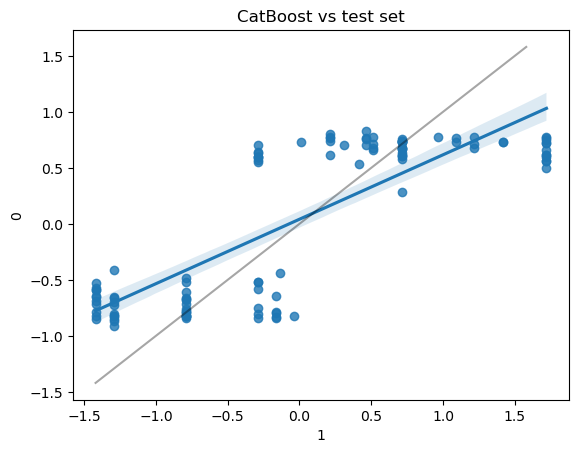

CatBoost vs test set


,0,1,error,mae,mse,r2
0,-0.842705,-0.289563,0.553142,0.472789,0.587428,0.65007


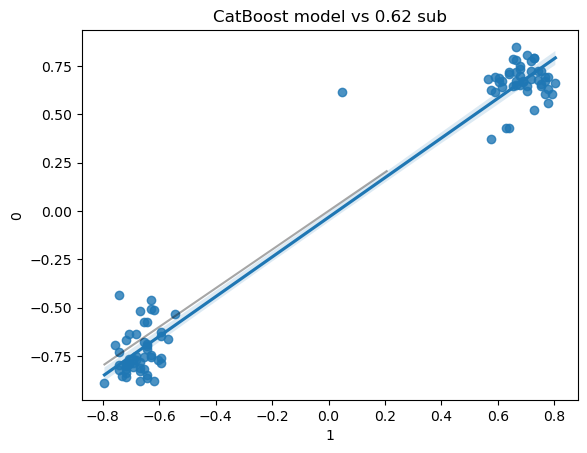

CatBoost model vs 0.62 sub


,0,1,error,mae,mse,r2
0,0.782737,0.665169,-0.117568,0.101665,0.128003,0.964342


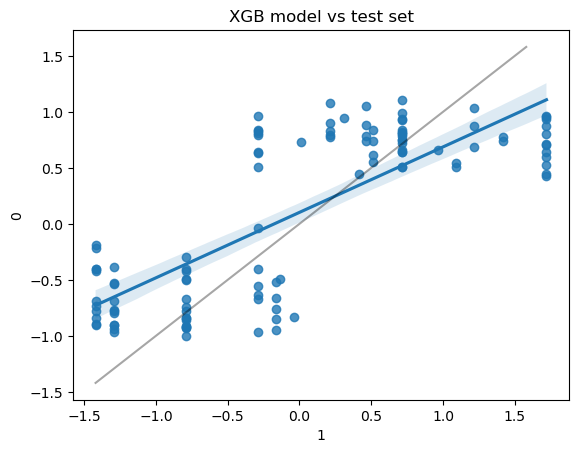

XGB model vs test set


,0,1,error,mae,mse,r2
0,-0.965349,-0.289563,0.675786,0.515221,0.628635,0.599253


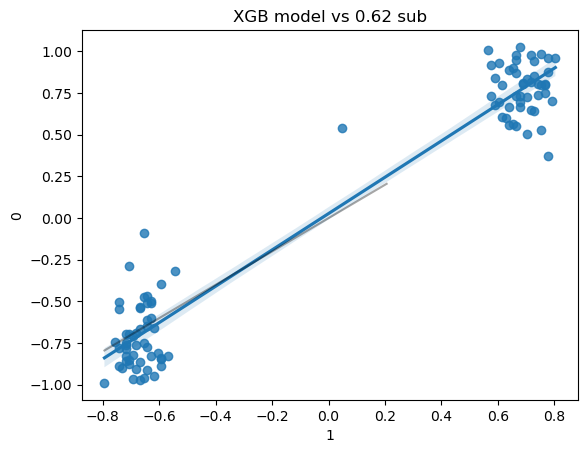

XGB model vs 0.62 sub


,0,1,error,mae,mse,r2
0,0.732561,0.665169,-0.067392,0.156099,0.195848,0.916525


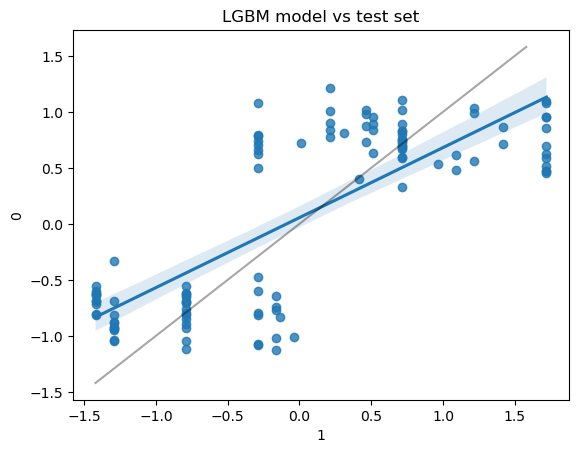

LGBM model vs test set


,0,1,error,mae,mse,r2
0,-1.080424,-0.289563,0.790861,0.511322,0.623603,0.605644


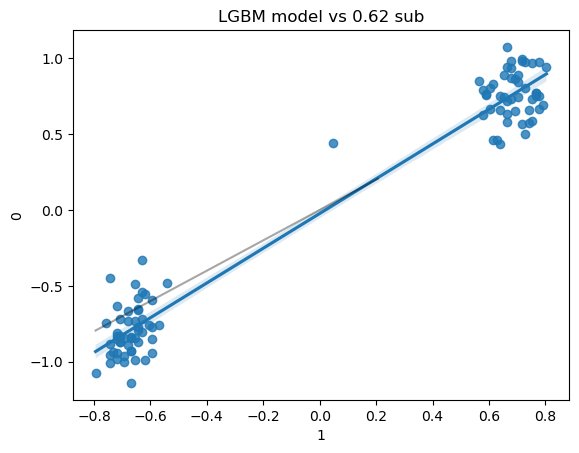

LGBM model vs 0.62 sub


,0,1,error,mae,mse,r2
0,0.63548,0.665169,0.02969,0.16239,0.192154,0.919644


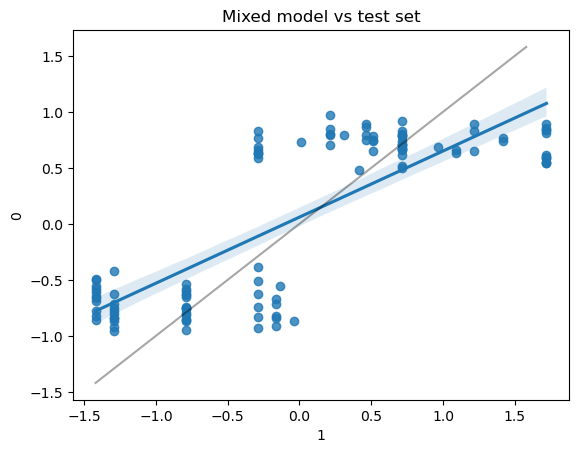

Mixed model vs test set


,0,1,error,mae,mse,r2
0,-0.932796,-0.289563,0.643233,0.486013,0.598575,0.636663


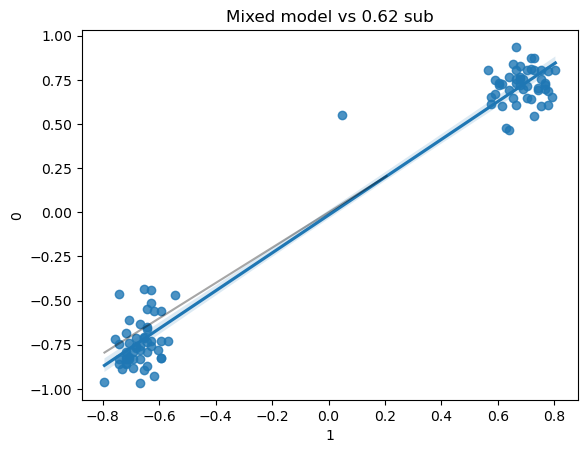

Mixed model vs 0.62 sub


,0,1,error,mae,mse,r2
0,0.733379,0.665169,-0.068209,0.111853,0.137741,0.95871


In [ ]:
plot = True
EvaluationPlot(models_cat, xtest_enhanced, ytest, 'CatBoost vs test set', is_sklearn=True, plot=plot)
EvaluationPlot(models_cat, xsub_enhanced, ytrue, 'CatBoost model vs 0.62 sub', is_sklearn=True, plot=plot)

EvaluationPlot(models_xgb, xtest_enhanced , ytest, 'XGB model vs test set', is_sklearn=True, plot=plot)
EvaluationPlot(models_xgb, xsub_enhanced , ytrue, 'XGB model vs 0.62 sub', is_sklearn=True, plot=plot)

EvaluationPlot(models_lgbm, xtest_enhanced , ytest, 'LGBM model vs test set', is_sklearn=True, plot=plot)
EvaluationPlot(models_lgbm, xsub_enhanced , ytrue, 'LGBM model vs 0.62 sub', is_sklearn=True, plot=plot)

EvaluationPlot([*models_xgb, *models_cat, *models_lgbm], xtest_enhanced , ytest, 'Mixed model vs test set', is_sklearn=True, plot=plot)
EvaluationPlot([*models_xgb, *models_cat, *models_lgbm], xsub_enhanced , ytrue, 'Mixed model vs 0.62 sub', is_sklearn=True, plot=plot)

### NN Models

In [ ]:
EvaluationPlot(models, xtest, ytest, 'KFold ConvNet vs Test Set')
EvaluationPlot(model, xtest, ytest, '1 ConvNet vs Test Set')
EvaluationPlot(models_tr, xtest, ytest, 'KFold Transformers vs Test Set')
EvaluationPlot(model_tr, xtest, ytest, '1 Transformer vs Test Set')
EvaluationPlot(np.append(model, model_tr), xtest, ytest, 'Mix vs test submission')

EvaluationPlot(models, xsub , ytrue, 'KFold ConvNet vs 0.62 submission')

EvaluationPlot(model, xsub , ytrue, '1 ConvNet vs 0.62 submission')

EvaluationPlot(models_tr, xsub , ytrue, 'KFold Transformers vs 0.62 submission')

EvaluationPlot(model_tr, xsub , ytrue, '1 Transformer vs 0.62 submission')

EvaluationPlot(np.append(model, model_tr), xsub , ytrue, 'Mix vs 0.62 submission')

KFold ConvNet vs Test Set


,0,1,error,mae,mse,r2
0,-1.093364,-0.289563,0.8038,0.482271,0.596391,0.639309


1 ConvNet vs Test Set


,0,1,error,mae,mse,r2
0,-1.019938,-0.289563,0.730375,0.472299,0.579839,0.659052


KFold Transformers vs Test Set


,0,1,error,mae,mse,r2
0,-1.015725,-0.289563,0.726162,0.463607,0.573367,0.666621


1 Transformer vs Test Set


,0,1,error,mae,mse,r2
0,-0.967319,-0.289563,0.677756,0.4627,0.570608,0.669822


Mix vs test submission


,0,1,error,mae,mse,r2
0,-0.993629,-0.289563,0.704066,0.467453,0.574686,0.665085


KFold ConvNet vs 0.62 submission


,0,1,error,mae,mse,r2
0,0.988239,0.665169,-0.32307,0.231771,0.266127,0.845867


1 ConvNet vs 0.62 submission


,0,1,error,mae,mse,r2
0,0.88182,0.665169,-0.216651,0.201633,0.228725,0.886147


KFold Transformers vs 0.62 submission


,0,1,error,mae,mse,r2
0,0.81011,0.665169,-0.144941,0.175949,0.209072,0.904872


1 Transformer vs 0.62 submission


,0,1,error,mae,mse,r2
0,0.817615,0.665169,-0.152445,0.168979,0.200127,0.912837


Mix vs 0.62 submission


,0,1,error,mae,mse,r2
0,0.849717,0.665169,-0.184548,0.184429,0.212691,0.90155


In [ ]:
EvaluationPlot([*model, *models_cat], xtest, ytest, 'Mix vs test submission')
EvaluationPlot([*model, *models_cat], xsub , ytrue, 'Mix vs 0.62 submission')

Mix vs test submission


,0,1,error,mae,mse,r2
0,-0.931322,-0.289563,0.641759,0.46208,0.575924,0.663641


Mix vs 0.62 submission


,0,1,error,mae,mse,r2
0,0.832278,0.665169,-0.167109,0.131537,0.155707,0.947237


In [520]:
from sklearn.base import BaseEstimator, RegressorMixin

class ListOfRegressors(BaseEstimator, RegressorMixin):
    def __init__(self, estimators):
        self.estimators = estimators
        self.fitted=True

    def fit(self, X, y=None):
        pass

    def is_fitted(self):
        return True


    def predict(self, X):
        predictions = []
        for model in self.estimators:
            predictions.append(model.predict(X))
        return np.mean(predictions, axis=0)
    
models_cat_estimator = ListOfRegressors(models_cat)
models_xgb_estimator = ListOfRegressors(models_xgb)
models_lgbm_estimator = ListOfRegressors(models_lgbm)

In [539]:
from sklearn.ensemble import StackingRegressor, VotingRegressor
# from sklearn.model_selection import 

# sk_models_cat_vote = VotingRegressor(estimators=[('cat0', sk_model_cat)]).fit(xfulltrain_enhanced, yfulltrain)

# sk_models_xgb_vote = VotingRegressor(estimators=[('xgb0', sk_models_xgb[0]), ('xgb1', sk_models_xgb[1]), ('xgb2', sk_models_xgb[2]), ('xgb3', sk_models_xgb[3]),
#                                                   ('xgb4', sk_models_xgb[4])]).fit(xfulltrain_enhanced, yfulltrain)

# sk_models_lgbm_vote = VotingRegressor(estimators=[('lgbm0', sk_models_lgbm[0]), ('lgbm1', sk_models_lgbm[1]), ('lgbm2', sk_models_lgbm[2]), ('lgbm3', sk_models_lgbm[3]),
#                                                    ('lgbm4', sk_models_lgbm[4])]).fit(xfulltrain_enhanced, yfulltrain)


stack = StackingRegressor(estimators=[('cat', model_gbm), ('xgb', models_xgb[0]), ('lgbm', models_lgbm[0])],
                           final_estimator=models_cat[0], passthrough=True, verbose=1, n_jobs=-1)

In [543]:
stack.fit(x_enhanced, scaler_y_sub.transform(y))

0:	learn: 0.0240353	total: 33.2ms	remaining: 16.6s
499:	learn: 0.8264042	total: 17.5s	remaining: 0us


StackingRegressor(estimators=[('cat',
                               GradientBoostingRegressor(learning_rate=0.0199526231496888,
                                                         n_estimators=200)),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_i...
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=500, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None, ...)),
                              ('lgbm',
                               LGBMRegressor(learning_rate=0.0199526231496888,
                                             n_estimators=500,
                                             reg_lambda=25.118864315095795))],
                  final_estimator=<catboost.core.CatBoostRegressor object at 0x000001DEDDA76A40>,
                  n_jobs=-1, passthrough=True, verbose=1)

In [544]:
stack.score(xsub_enhanced, ytrue)

0.919190711331077

In [418]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, r2_score as r2
r2(ytest, stack.predict(xtest_enhanced))
r2(ytrue, stack.predict(xsub_enhanced))

0.906386916081391

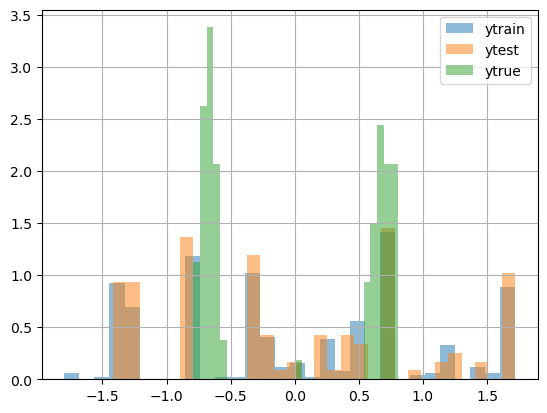

In [377]:
# Distribution of target variables
pd.Series(yfulltrain.squeeze()).hist(density=True, bins=30, label='ytrain', alpha=0.5)
pd.Series(ytest.squeeze()).hist(density=True, bins=30, label='ytest', alpha=0.5)
pd.Series(ytrue).hist(density=True, bins=30, label='ytrue', alpha=0.5)
plt.legend()

## Retrain with full data

In [157]:
# Train KFolds with validation data
models = KFoldTraining(x, y, model='convnet')

  0%|          | 0/200 [00:00<?, ?it/s]

20 time(s) has the R2 score not improved. Finishing training...ter: 19    
 best epoch: 35 "Best" training loss: 0.3498 best val_R2: 0.6209


  0%|          | 0/200 [00:00<?, ?it/s]

20 time(s) has the R2 score not improved. Finishing training...ter: 19    
 best epoch: 14 "Best" training loss: 0.4382 best val_R2: 0.6421


  0%|          | 0/200 [00:00<?, ?it/s]

20 time(s) has the R2 score not improved. Finishing training...ter: 19    
 best epoch: 12 "Best" training loss: 0.4383 best val_R2: 0.634


  0%|          | 0/200 [00:00<?, ?it/s]

20 time(s) has the R2 score not improved. Finishing training...ter: 19    
 best epoch: 5 "Best" training loss: 0.515 best val_R2: 0.6353


  0%|          | 0/200 [00:00<?, ?it/s]

20 time(s) has the R2 score not improved. Finishing training...ter: 19    
 best epoch: 11 "Best" training loss: 0.4544 best val_R2: 0.6574


In [158]:
# Average validation loss
r2_scores = np.array(models)[:, 1]
models = np.array(models)[:, 0]

print('Average R2 on k-fold:' , r2_scores.mean())

Average R2 on k-fold: 0.6379372656987042


In [159]:
# Train once on all data
model_full = []
for i in np.linspace(30, 50, 5, dtype=int):
    model_full.append(FullDataTraining(x, y, n_epochs=i, model='transformer'))

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

In [160]:
EvaluationPlot(models, xsub, ytrue)
EvaluationPlot(model_full, xsub, ytrue)
EvaluationPlot([*models, *model_full], xsub, ytrue, is_sklearn=False)

,0,1,error,mae,mse,r2
0,0.703483,0.694731,-0.008752,0.242715,0.297145,0.807594


,0,1,error,mae,mse,r2
0,0.754357,0.694731,-0.059626,0.224748,0.285576,0.822284


,0,1,error,mae,mse,r2
0,0.72892,0.694731,-0.034189,0.202187,0.258756,0.854097


In [ ]:
# Enhancear con el modelo recién entrenado full
x_enhanced = GetEncodings(x_scaled, [models, model_full], to_return='original')
xsub_enhanced = GetEncodings(xsub, [models, model_full], to_return='original')

Default metric period is 5 because R2 is/are not implemented for GPU
Metric R2 is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	learn: 0.0216334	test: 0.0140280	best: 0.0140280 (0)	total: 50.2ms	remaining: 50.1s
100:	learn: 0.6479669	test: 0.5171884	best: 0.5171884 (100)	total: 2.7s	remaining: 24.1s
200:	learn: 0.7174642	test: 0.5590513	best: 0.5590513 (200)	total: 5.26s	remaining: 20.9s
300:	learn: 0.7484298	test: 0.5671231	best: 0.5672224 (294)	total: 7.86s	remaining: 18.3s
bestTest = 0.569539014
bestIteration = 330
Shrink model to first 331 iterations.


Default metric period is 5 because R2 is/are not implemented for GPU
Metric R2 is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	learn: 0.0195932	test: 0.0156070	best: 0.0156070 (0)	total: 30.4ms	remaining: 30.4s
100:	learn: 0.6412831	test: 0.5772065	best: 0.5772065 (100)	total: 2.56s	remaining: 22.8s
200:	learn: 0.7108829	test: 0.6328804	best: 0.6328804 (200)	total: 5.11s	remaining: 20.3s
300:	learn: 0.7431816	test: 0.6431462	best: 0.6434331 (297)	total: 7.69s	remaining: 17.9s
400:	learn: 0.7728517	test: 0.6478675	best: 0.6481767 (392)	total: 10.3s	remaining: 15.3s
bestTest = 0.6481767107
bestIteration = 392
Shrink model to first 393 iterations.


Default metric period is 5 because R2 is/are not implemented for GPU
Metric R2 is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	learn: 0.0197267	test: 0.0115372	best: 0.0115372 (0)	total: 25.9ms	remaining: 25.9s
100:	learn: 0.6342879	test: 0.6141792	best: 0.6141792 (100)	total: 2.59s	remaining: 23.1s
200:	learn: 0.7104891	test: 0.6556043	best: 0.6556043 (200)	total: 5.14s	remaining: 20.4s
bestTest = 0.6579784589
bestIteration = 240
Shrink model to first 241 iterations.


Default metric period is 5 because R2 is/are not implemented for GPU
Metric R2 is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	learn: 0.0206702	test: 0.0210520	best: 0.0210520 (0)	total: 25.7ms	remaining: 25.6s
100:	learn: 0.6335669	test: 0.6311309	best: 0.6311309 (100)	total: 2.53s	remaining: 22.5s
bestTest = 0.6588448259
bestIteration = 173
Shrink model to first 174 iterations.


Default metric period is 5 because R2 is/are not implemented for GPU
Metric R2 is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	learn: 0.0199007	test: 0.0214049	best: 0.0214049 (0)	total: 26.2ms	remaining: 26.2s
100:	learn: 0.6333149	test: 0.6048009	best: 0.6048009 (100)	total: 2.51s	remaining: 22.4s
200:	learn: 0.7084686	test: 0.6394231	best: 0.6395906 (198)	total: 5.06s	remaining: 20.1s
bestTest = 0.6410655995
bestIteration = 227
Shrink model to first 228 iterations.
[18:25:25] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[0]	validation_0-rmse:1.12081
[1]	validation_0-rmse:1.10983
[2]	validation_0-rmse:1.09927
[3]	validation_0-rmse:1.08887
[4]	validation_0-rmse:1.07776
[5]	validation_0-rmse:1.06680
[6]	validation_0-rmse:1.05627
[7]	validation_0-rmse:1.04593
[8]	validation_0-rmse:1.03701
[9]	validation_0-rmse:1.02822
[10]	validation_0-rmse:1.01889
[11]	validation_0-rmse:1.00952
[12]	validation_0-rmse:1.00059
[13]	validation_0-rmse:0.99229
[14]	validation_0-rmse:0.98380
[15]	validation_0-rmse:0.97578
[16]	validation_0-rmse:0.96754
[17]	validation_0-rmse:0.95928
[18]	validation_0-

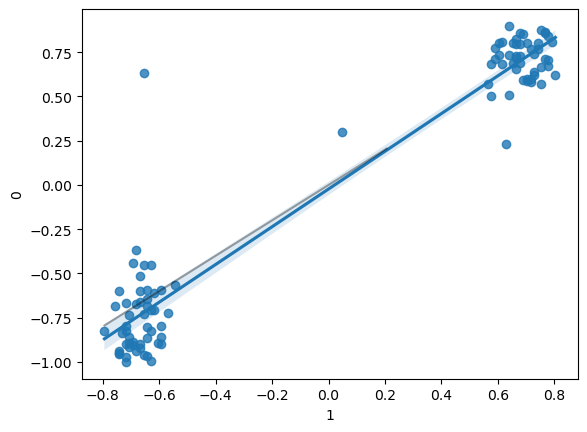

,0,1,error,mae,mse,r2
0,0.823525,0.665169,-0.158356,0.147244,0.207317,0.906462


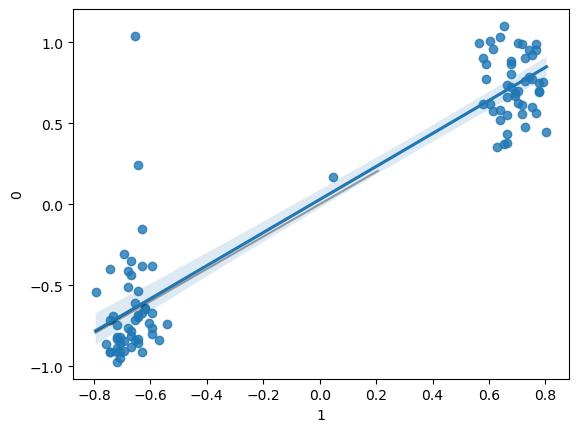

,0,1,error,mae,mse,r2
0,0.551081,0.665169,0.114088,0.190552,0.277041,0.832966


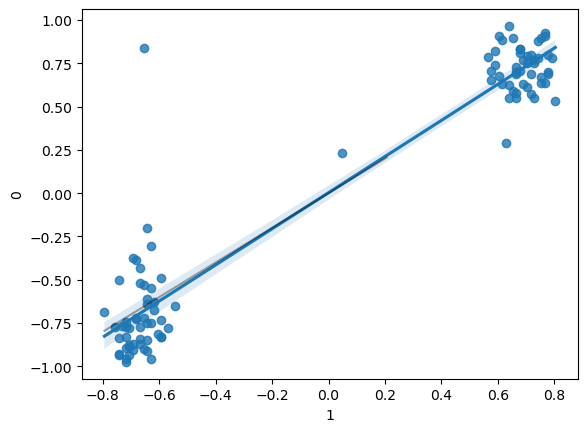

,0,1,error,mae,mse,r2
0,0.687303,0.665169,-0.022134,0.152641,0.223765,0.891031


In [ ]:
# sk_model_cat.fit(x_enhanced, scaler_y_sub.transform(y))
# sk_model_xgb.fit(x_enhanced, scaler_y_sub.transform(y))
sk_models_cat = KFoldTraining(x_enhanced, scaler_y_sub.transform(y), 5, True, sk_model_cat)
sk_models_xgb = KFoldTraining(x_enhanced, scaler_y_sub.transform(y), 5, True, sk_model_xgb)
EvaluationPlot(sk_models_cat, xsub_enhanced, ytrue, is_sklearn=True, plot=True)
EvaluationPlot(sk_models_xgb, xsub_enhanced, ytrue, is_sklearn=True, plot=True)
EvaluationPlot([*sk_models_cat, *sk_models_xgb], xsub_enhanced, ytrue, is_sklearn=True, plot=True)

# Make predictions and submit

In [588]:
# sub_preds = np.array(kfold_preds).mean(0)
# # sub_preds = model_full(xsub.to('cuda')).cpu().detach().numpy()
sub_preds = scaler_y_sub.inverse_transform(MakePredictions(sk_models_cat, xsub_enhanced, is_sklearn=True).reshape(-1, 1)).squeeze()

sub_preds

array([7285.8645614 , 5840.14410577, 6223.88753443, 7178.40571307,
       5944.94582613, 7029.73905778, 6104.72822105, 6158.26731255,
       7103.56271249, 7275.64044482, 6183.6382847 , 6156.06882262,
       5947.30199159, 6086.68202273, 6070.87829764, 7220.27705278,
       6086.68524635, 6117.51418513, 5904.6548221 , 7245.30159803,
       7160.87656443, 5836.40485935, 7140.52817499, 5950.24841322,
       7178.12786175, 7209.62115396, 7086.63627378, 6100.24255946,
       5863.10923674, 6160.11064074, 5899.33333357, 5884.90428461,
       7242.17896434, 7151.42018627, 7313.24319427, 7213.54347399,
       5974.49721787, 5999.29387505, 6870.21269044, 6096.88968969,
       7173.60665569, 5872.40804827, 5992.60013923, 7269.33766235,
       5912.12525944, 6272.52818589, 6045.56930988, 7093.75212706,
       6154.28887238, 6340.59416366, 7345.65323691, 7314.82306602,
       5866.76729772, 7274.82704049, 7133.45447527, 7301.83995506,
       7083.01028101, 7326.62055613, 5915.58887303, 6272.89515

In [589]:
submission_df = pd.read_csv('Challenge_2_submission_template.csv')
submission_df['Predicted Rice Yield (kg/ha)'] = sub_preds
submission_df.head()

,ID No,District,Latitude,Longitude,"Season(SA = Summer Autumn, WS = Winter Spring)","Rice Crop Intensity(D=Double, T=Triple)",Date of Harvest,Field size (ha),Predicted Rice Yield (kg/ha)
0,1,Chau_Phu,10.542192,105.187920,WS,T,10-04-2022,1.40,7285.864561
1,2,Chau_Thanh,10.400189,105.331053,SA,T,15-07-2022,1.32,5840.144106
2,3,Chau_Phu,10.505489,105.203926,SA,D,14-07-2022,1.40,6223.887534
3,4,Chau_Phu,10.523520,105.138274,WS,D,10-04-2022,1.80,7178.405713
4,5,Thoai_Son,10.294660,105.248528,SA,T,20-07-2022,2.20,5944.945826


In [590]:
submission_df.to_csv('Version 17.2.csv', index=False)